### FINAL MODELING (SIMPLE NEURAL NETWORKS)

#### Importing data

Using 3.11.0 for this notebook to use tensorflow

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score



In [3]:
# Importing dataset
data_draw = pd.read_csv('../data/processed/Draw_Ticket.csv')
data_scratch = pd.read_csv('../data/processed/Scratch_Ticket.csv')
X_se = pd.read_csv('../data/processed/Scratch_Ticket_Encoded.csv')
X_de = pd.read_csv('../data/processed/Draw_Ticket_Encoded.csv')

(1187858,)

In [18]:
# Using prize amount as defining feature
X_s = data_scratch.drop(columns=['Amount Won'])
y_s = data_scratch['Amount Won']
X_d = data_draw.drop(columns=['Amount Won'])
y_d = data_draw['Amount Won']

#### Neural Network Trial and Error


In [30]:
X_se.head()

US Citizen Flag  Claimant City  Claimant State  Claimant County  \
0          1415950            131            3143              345   
1           240211          98698         1424945           118575   
2           240211          98698         1424945           118575   
3          1415950            976           12992             3096   
4           240211              7           10390              225   

   Scratch Ticket Cost  Retailer Name  Retailer City  Retailer County  
0                 10.0             41           3709            12135  
1                 20.0             11         121751           137891  
2                 20.0             67            612           137891  
3                  3.0             96           4388             6954  
4                  1.0             29         144231           208567

In [29]:
X_de.head()

US Citizen Flag  Claimant City  Claimant State  Claimant County  \
0          1088886            762         1071630             2778   
1          1088886            762         1071630             2778   
2          1088886            762         1071630             2778   
3          1088886            762         1071630             2778   
4          1088886          26247         1071630           121994   

   Scratch Ticket or Draw Game  Date Ticket Sold  Retailer Name  \
0                       185619              3707         242363   
1                       185619               121         242363   
2                       185619                95         242363   
3                       185619               235         242363   
4                       185619               292         242363   

   Retailer City  Retailer County  
0          92565           226033  
1          63033           226033  
2           4490              965  
3            945           226033  
4           1282            47313

In [28]:
# Dropping unnecessary columns
X_se = X_se.drop(columns=['Unnamed: 0'])
X_de = X_de.drop(columns=['Unnamed: 0'])

In [32]:
# Training in a 70-30 test split
X_se_train, X_se_test, y_s_train, y_s_test = train_test_split(X_se, y_s, test_size=0.3, random_state=4)
X_de_train, X_de_test, y_d_train, y_d_test = train_test_split(X_de, y_d, test_size=0.3, random_state=4)

In [80]:
# random seeds for reproducibility
tf.random.set_seed(123)

# Create a new sequential model
model_s = keras.Sequential()

# Declare the hidden layers
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_s.add(layers.Dense(1))

# Compile the model
model_s.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # Metric used to evaluate model
)

# Create a new sequential model
model_d = keras.Sequential()

# Declare the hidden layers
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_d.add(layers.Dense(1))

# Compile the model
model_d.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [91]:
# Fit the model
history = model_s.fit(X_se_train, y_s_train, epochs=50, verbose=1)

Epoch 1/50
 7898/36497 ━━━━━━━━━━━━━━━━━━━━ 21s 739us/step - loss: 2519716864.0000

KeyboardInterrupt: 

The loss averages around the 4 billions which is not the best, what can we do to make the loss as close to 0 as possible?


It could be that the target range (prize amount) is too big especially since it ranges from 0 to the 20 million for scratch and up to 400 million for draws.

One way to keep the weight of the higher amounts and outliers but reduce the range is to put the prize values into a logarithmic function

In [63]:
print(y_s.max())
print(y_d.max())

20000000.0
409297624.0


In [172]:
# +1 to avoid log(0)
y_slog = np.log(y_s + 1)
y_dlog = np.log(y_d + 1)

In [66]:
print(y_slog.max())
print(y_dlog.max())

16.811242881518265
19.82995313885601


Training with logarithmic y values and lower epoch to 10 since each epoch takes about 30 sec (too much runtime)

In [173]:
# Training in a 70-30 test split
X_se_train, X_se_test, y_slog_train, y_slog_test = train_test_split(X_se, y_slog, test_size=0.3, random_state=4)
X_de_train, X_de_test, y_dlog_train, y_dlog_test = train_test_split(X_de, y_dlog, test_size=0.3, random_state=4)

In [105]:
# random seeds for reproducibility
tf.random.set_seed(246)

# Create a new sequential model
model_s = keras.Sequential()

# Declare the hidden layers
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_s.add(layers.Dense(1))

# Compile the model
model_s.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

# Create a new sequential model
model_d = keras.Sequential()

# Declare the hidden layers
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_d.add(layers.Dense(1))

# Compile the model
model_d.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [106]:
# Fit the model
history = model_s.fit(X_se_train, y_slog_train, epochs=10, verbose=1)

Epoch 1/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 28s 748us/step - loss: 1800835.1250
Epoch 2/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 27s 737us/step - loss: 7.6821
Epoch 3/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 27s 751us/step - loss: 7.6810
Epoch 4/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 28s 760us/step - loss: 7.6807
Epoch 5/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 28s 770us/step - loss: 7.6806
Epoch 6/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 28s 753us/step - loss: 7.6806
Epoch 7/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 29s 780us/step - loss: 7.6806
Epoch 8/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 28s 770us/step - loss: 7.6806
Epoch 9/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 32s 871us/step - loss: 7.6806
Epoch 10/10
36497/36497 ━━━━━━━━━━━━━━━━━━━━ 27s 750us/step - loss: 7.6806


In [107]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model_s.evaluate(X_se_test, y_slog_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred_s = model_s.predict(X_se_test)

Train Loss: 7.6812
Test Loss: 7.6780
15642/15642 ━━━━━━━━━━━━━━━━━━━━ 7s 413us/step


In [108]:
from sklearn.metrics import r2_score

r2_score(y_slog_test,y_pred_s)

0.01790204795099637

It's better than before but the loss is still not as close to 0 as we want it and it stays around 7.6

We'll try scaling the data, perhaps the overwhelming amount of points in Texas for categories like Claimer State mess with the training

In [115]:
from sklearn.preprocessing import StandardScaler

X_se_train, X_se_test, y_slog_train, y_slog_test = train_test_split(X_se, y_slog, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_se_train)
X_se_train = scaler.transform(X_se_train)
X_se_test = scaler.transform(X_se_test)

X_de_train, X_de_test, y_dlog_train, y_dlog_test = train_test_split(X_de, y_dlog, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_de_train)
X_de_train = scaler.transform(X_de_train)
X_de_test = scaler.transform(X_de_test)

In [118]:
# random seeds for reproducibility
tf.random.set_seed(24)

# Create a new sequential model
model_s = keras.Sequential()

# Declare the hidden layers
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))
model_s.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_s.add(layers.Dense(1))

# Compile the model
model_s.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

# Create a new sequential model
model_d = keras.Sequential()

# Declare the hidden layers
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))
model_d.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model_d.add(layers.Dense(1))

# Compile the model
model_d.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [119]:
# Fit the model
history = model_s.fit(X_se_train, y_slog_train, epochs=10, verbose=1)

Epoch 1/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 34s 791us/step - loss: 3.9154
Epoch 2/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 831us/step - loss: 3.5662
Epoch 3/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 848us/step - loss: 3.5235
Epoch 4/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 37s 884us/step - loss: 3.5171
Epoch 5/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 839us/step - loss: 3.5128
Epoch 6/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 842us/step - loss: 3.5086
Epoch 7/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 838us/step - loss: 3.5070
Epoch 8/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 39s 936us/step - loss: 3.5047
Epoch 9/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 40s 969us/step - loss: 3.5037
Epoch 10/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 36s 865us/step - loss: 3.5011


In [120]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model_s.evaluate(X_se_test, y_slog_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred_s = model_s.predict(X_se_test)

Train Loss: 3.4927
Test Loss: 3.4825
10428/10428 ━━━━━━━━━━━━━━━━━━━━ 5s 430us/step


In [121]:
r2_score(y_slog_test,y_pred_s)

0.5553543195158164

A much better R squared compared to the last method, and especially compared to the baseline modeling

In [175]:
# random seeds for reproducibility
tf.random.set_seed(24)

# Create a new sequential model
model_s = keras.Sequential()

# Declare the hidden layers
model_s.add(layers.Dense(25, activation="relu"))
model_s.add(layers.Dense(25, activation="relu"))
model_s.add(layers.Dense(25, activation="relu"))

# Declare the output layer
model_s.add(layers.Dense(1))

# Compile the model
model_s.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

# Create a new sequential model
model_d = keras.Sequential()

# Declare the hidden layers
model_d.add(layers.Dense(25, activation="relu"))
model_d.add(layers.Dense(25, activation="relu"))
model_d.add(layers.Dense(25, activation="relu"))

# Declare the output layer
model_d.add(layers.Dense(1))

# Compile the model
model_d.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [176]:
# Fit the model
history = model_s.fit(X_se_train, y_slog_train, epochs=10, verbose=1)

Epoch 1/10
24236/36497 ━━━━━━━━━━━━━━━━━━━━ 10s 865us/step - loss: 111538856.0000

KeyboardInterrupt: 

In [124]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model_s.evaluate(X_se_test, y_slog_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred_s = model_s.predict(X_se_test)

Train Loss: 3.4207
Test Loss: 3.4688
10428/10428 ━━━━━━━━━━━━━━━━━━━━ 5s 466us/step


In [125]:
r2_score(y_slog_test,y_pred_s)

0.5571042403690531

Raising complexity of neural network only minimally decreases loss and increase R squared, so we will keep it at 25 without increasing keeping in mind runtime

### FINAL MODEL

#### Neural Network

In [4]:
# Using fresh data just in case past data is biased from training trial and error
X_se_final = X_se.copy()
y_s_final = data_scratch['Amount Won']
X_de_final = X_de.copy()
y_d_final = data_draw['Amount Won']

In [5]:
# Dropping unnecessary columns
X_se_final = X_se.drop(columns=['Unnamed: 0'])
X_de_final = X_de.drop(columns=['Unnamed: 0'])

In [6]:
# +1 to avoid log(0)
y_slog_final = np.log(y_s_final + 1)
y_dlog_final = np.log(y_d_final + 1)

In [7]:
y_s_final.shape

(1668423,)

In [8]:
from sklearn.preprocessing import StandardScaler

X_se_final_train, X_se_final_test, y_slog_final_train, y_slog_final_test = train_test_split(X_se_final, y_slog_final, test_size=0.2, random_state=42)

scaler_s = StandardScaler().fit(X_se_final_train)
X_se_final_train_scaled = scaler_s.transform(X_se_final_train)
X_se_final_test_scaled = scaler_s.transform(X_se_final_test)

X_de_final_train, X_de_final_test, y_dlog_final_train, y_dlog_final_test = train_test_split(X_de_final, y_dlog_final, test_size=0.2, random_state=42)

scaler_d = StandardScaler().fit(X_de_final_train)
X_de_final_train_scaled = scaler_d.transform(X_de_final_train)
X_de_final_test_scaled = scaler_d.transform(X_de_final_test)

In [10]:
# random seeds for reproducibility
tf.random.set_seed(44)

# Create a new sequential model
model_s = keras.Sequential()

# Declare the hidden layers
model_s.add(layers.Dense(25, activation="relu"))
model_s.add(layers.Dense(25, activation="relu"))
model_s.add(layers.Dense(25, activation="relu"))

# Declare the output layer
model_s.add(layers.Dense(1))

# Compile the model
model_s.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

# Create a new sequential model
model_d = keras.Sequential()

# Declare the hidden layers
model_d.add(layers.Dense(25, activation="relu"))
model_d.add(layers.Dense(25, activation="relu"))
model_d.add(layers.Dense(25, activation="relu"))

# Declare the output layer
model_d.add(layers.Dense(1))

# Compile the model
model_d.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [11]:
# Fit the model
history_s = model_s.fit(X_se_final_train_scaled, y_slog_final_train, epochs=10, verbose=1)

Epoch 1/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 32s 744us/step - loss: 3.6905
Epoch 2/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 32s 769us/step - loss: 3.4464
Epoch 3/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 32s 765us/step - loss: 3.4286
Epoch 4/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 31s 746us/step - loss: 3.4208
Epoch 5/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 32s 768us/step - loss: 3.4180
Epoch 6/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 32s 775us/step - loss: 3.4066
Epoch 7/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 33s 795us/step - loss: 3.4028
Epoch 8/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 833us/step - loss: 3.3980
Epoch 9/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 37s 882us/step - loss: 3.4031
Epoch 10/10
41711/41711 ━━━━━━━━━━━━━━━━━━━━ 35s 834us/step - loss: 3.4136


In [12]:
# Fit the model
history_d = model_d.fit(X_de_final_train_scaled, y_dlog_final_train, epochs=10, verbose=1)

Epoch 1/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 24s 789us/step - loss: 3.6000
Epoch 2/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 763us/step - loss: 3.2669
Epoch 3/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 779us/step - loss: 3.2275
Epoch 4/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 769us/step - loss: 3.2101
Epoch 5/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 778us/step - loss: 3.2051
Epoch 6/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 771us/step - loss: 3.1694
Epoch 7/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 788us/step - loss: 3.1430
Epoch 8/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 766us/step - loss: 3.1553
Epoch 9/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 24s 802us/step - loss: 3.1676
Epoch 10/10
29697/29697 ━━━━━━━━━━━━━━━━━━━━ 23s 766us/step - loss: 3.1697


In [13]:
# Evaluate the model using the test data and generate predictions
train_loss_s = history_s.history["loss"][-1]
result_s = model_s.evaluate(X_se_final_test_scaled, y_slog_final_test, verbose=0)

print(f"Train Loss: {train_loss_s:.4f}")
print(f"Test Loss: {result_s:.4f}")

y_pred_final_s = model_s.predict(X_se_final_test_scaled)

Train Loss: 3.4127
Test Loss: 3.4749
10428/10428 ━━━━━━━━━━━━━━━━━━━━ 4s 410us/step


In [14]:
# Evaluate the model using the test data and generate predictions
train_loss_d = history_d.history["loss"][-1]
result_d = model_d.evaluate(X_de_final_test_scaled, y_dlog_final_test, verbose=0)

print(f"Train Loss: {train_loss_d:.4f}")
print(f"Test Loss: {result_d:.4f}")

y_pred_final_d = model_d.predict(X_de_final_test_scaled)

Train Loss: 3.1589
Test Loss: 3.2093
7425/7425 ━━━━━━━━━━━━━━━━━━━━ 3s 447us/step


In [17]:
r2_score(y_slog_final_test,y_pred_final_s)

0.5563299611953334

In [18]:
r2_score(y_dlog_final_test,y_pred_final_d)

0.45333175470243836

#### Decoding

Filtering the data into 100 of the most frequent categories (like most used retail name) to make it easier to graph and understand

In [19]:
cat_columns_s = ['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County', 'Retailer Name', 'Retailer City', 'Retailer County']
cat_columns_d = ['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County', 'Scratch Ticket or Draw Game', 'Date Ticket Sold', 'Retailer Name', 'Retailer City', 'Retailer County']

# Create an empty DataFrame to store filtered data
filtered_X_final_s = X_se_final_test.copy()
filtered_y_pred_final_s = y_pred_final_s.copy()

# Loop through each categorical column and filter the top 100 categories
for column in cat_columns_s:
    # Get the top 100 most frequent categories for the column
    top_100_categories = X_se_final_test[column].value_counts().nlargest(100).index

    # Filter the dataset based on these top 100 categories
    filtered_y_pred_final_s = filtered_y_pred_final_s[filtered_X_final_s[column].isin(top_100_categories)]
    filtered_X_final_s = filtered_X_final_s[filtered_X_final_s[column].isin(top_100_categories)]

# Create an empty DataFrame to store filtered data
filtered_X_final_d = X_de_final_test.copy()
filtered_y_pred_final_d = y_pred_final_d.copy()

# Loop through each categorical column and filter the top 100 categories
for column in cat_columns_d:
    # Get the top 100 most frequent categories for the column
    top_100_categories = X_de_final_test[column].value_counts().nlargest(100).index

    # Filter the dataset based on these top 100 categories
    filtered_y_pred_final_d = filtered_y_pred_final_d[filtered_X_final_d[column].isin(top_100_categories)]
    filtered_X_final_d = filtered_X_final_d[filtered_X_final_d[column].isin(top_100_categories)]

In [20]:
import json

In [21]:
# --- Decoding Example ---
# Load mappings for X_s
try:
    with open('../data/processed/freq_mappings_X_s.json', 'r') as f:
        reverse_frequency_mapping_s = json.load(f)
except Exception as e:
    print(f"Error loading mappings (X_s): {e}")
    raise

X_sd = filtered_X_final_s.copy()
for column in cat_columns_s:
    if column not in reverse_frequency_mapping_s:
        print(f"Warning: Mapping for {column} not found in X_s, skipping")
        continue
    # Convert string counts to int
    reverse_mapping = {int(k): v for k, v in reverse_frequency_mapping_s[column].items()}
    def decode_freq(value, mapping, tolerance=1e-6):
        for freq, cat in mapping.items():
            if abs(value - freq) < tolerance:
                return cat
        return 'Unknown'
    try:
        X_sd[column] = X_se_final_test[column].apply(lambda x: decode_freq(x, reverse_mapping))
    except Exception as e:
        print(f"Error decoding {column} (X_s): {e}")
        continue

# --- Decoding Example (Optional) ---
# Load mappings for X_s
try:
    with open('../data/processed/freq_mappings_X_d.json', 'r') as f:
        reverse_frequency_mapping_d = json.load(f)
except Exception as e:
    print(f"Error loading mappings (X_d): {e}")
    raise

X_dd = filtered_X_final_d.copy()
for column in cat_columns_d:
    if column not in reverse_frequency_mapping_d:
        print(f"Warning: Mapping for {column} not found in X_d, skipping")
        continue
    # Convert string counts to int
    reverse_mapping = {int(k): v for k, v in reverse_frequency_mapping_d[column].items()}
    def decode_freq(value, mapping, tolerance=1e-6):
        for freq, cat in mapping.items():
            if abs(value - freq) < tolerance:
                return cat
        return 'Unknown'
    try:
        X_dd[column] = X_de_final_test[column].apply(lambda x: decode_freq(x, reverse_mapping))
    except Exception as e:
        print(f"Error decoding {column} (X_d): {e}")
        continue

In [22]:
X_sd.shape

(115959, 8)

In [23]:
X_se_final_test.shape

(333685, 8)

In [24]:
X_de_final_test.shape

(237572, 9)

In [25]:
filtered_y_pred_final_s.shape

(115959, 1)

In [26]:
X_sd.head()

US Citizen Flag Claimant City Claimant State Claimant County  \
909207             Yes         Tulsa             OK         Tarrant   
192564             Yes        Dallas             TX          Dallas   
596571             Yes       Lubbock             TX         Lubbock   
974366             Yes    Fort Worth             TX          Harris   
261541             Yes          Waco             TX        Mclennan   

        Scratch Ticket Cost                     Retailer Name   Retailer City  \
909207                  1.0                           Unknown  Corpus Christi   
192564                 20.0                    QUIKTRIP #7901          Dallas   
596571                 50.0                           O X X O         Midland   
974366                  2.0                           Unknown           Bryan   
261541                 10.0  7-ELEVEN CONVENIENCE STORE 35399            Waco   

       Retailer County  
909207           Bexar  
192564          Dallas  
596571         Midland  
974366          Brazos  
261541        Mclennan

In [28]:
print(X_sd.columns)

Index(['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County',
       'Scratch Ticket Cost', 'Retailer Name', 'Retailer City',
       'Retailer County'],
      dtype='object')


In [27]:
X_sd['Claimant County']

909207      Tarrant
192564       Dallas
596571      Lubbock
974366       Harris
261541     Mclennan
             ...   
931914         Wise
1358684        Hood
852850     Angelina
176468       Harris
682047        Gregg
Name: Claimant County, Length: 115959, dtype: object

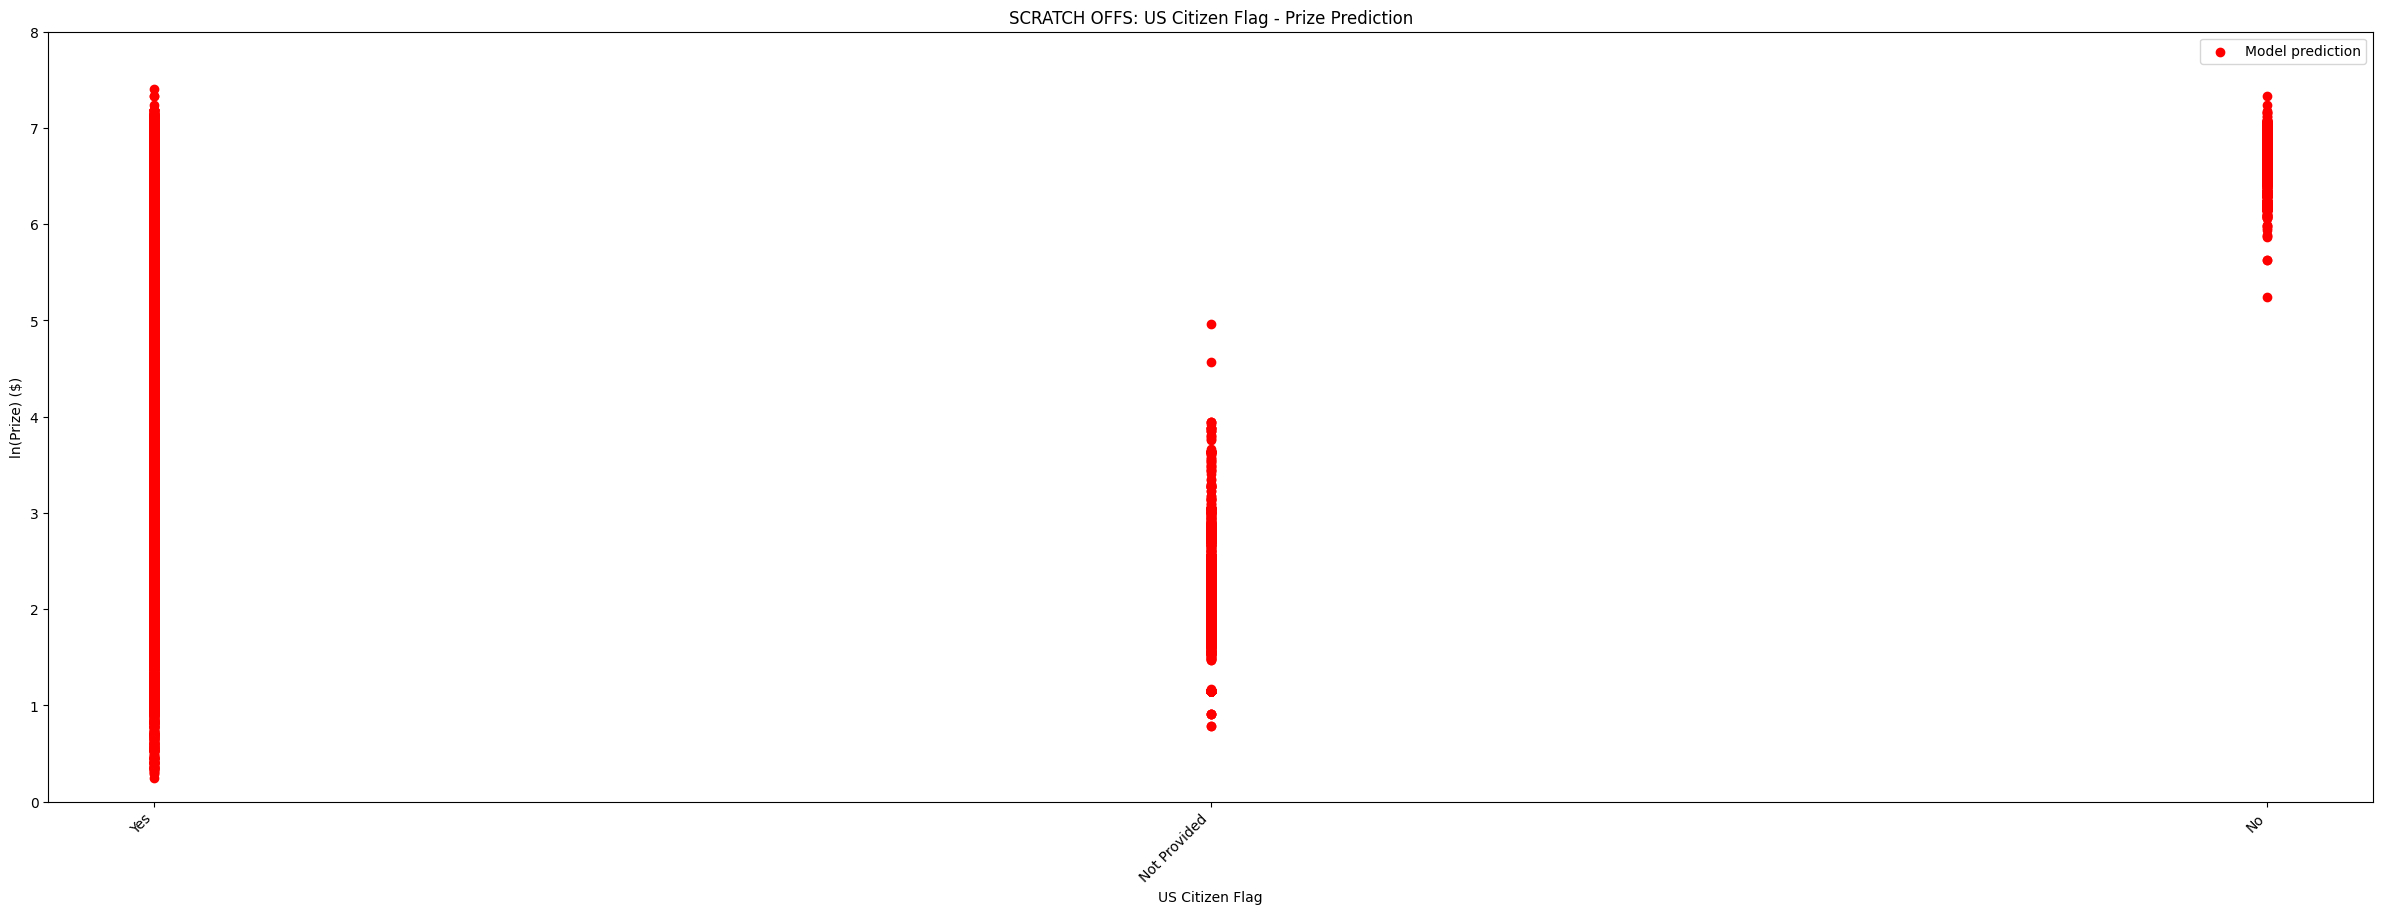

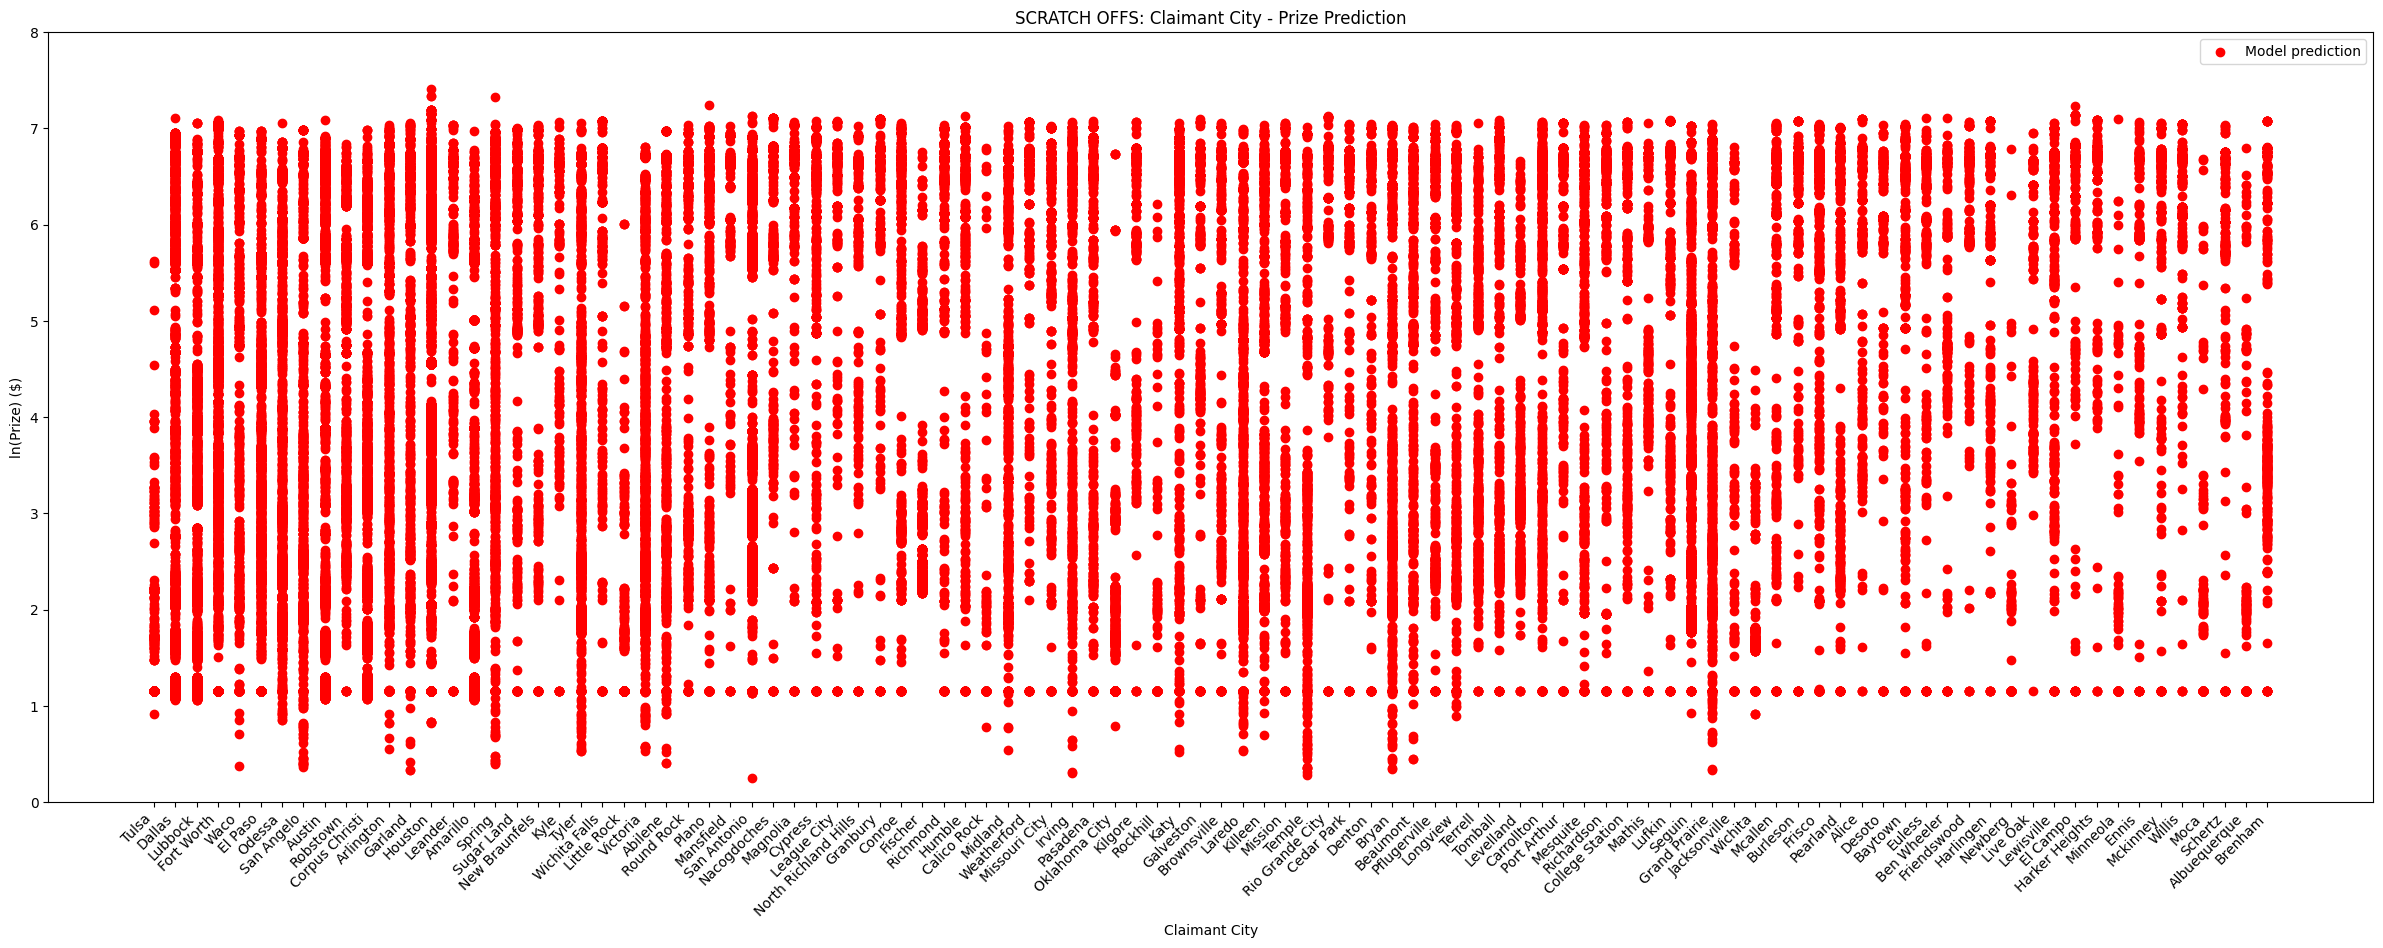

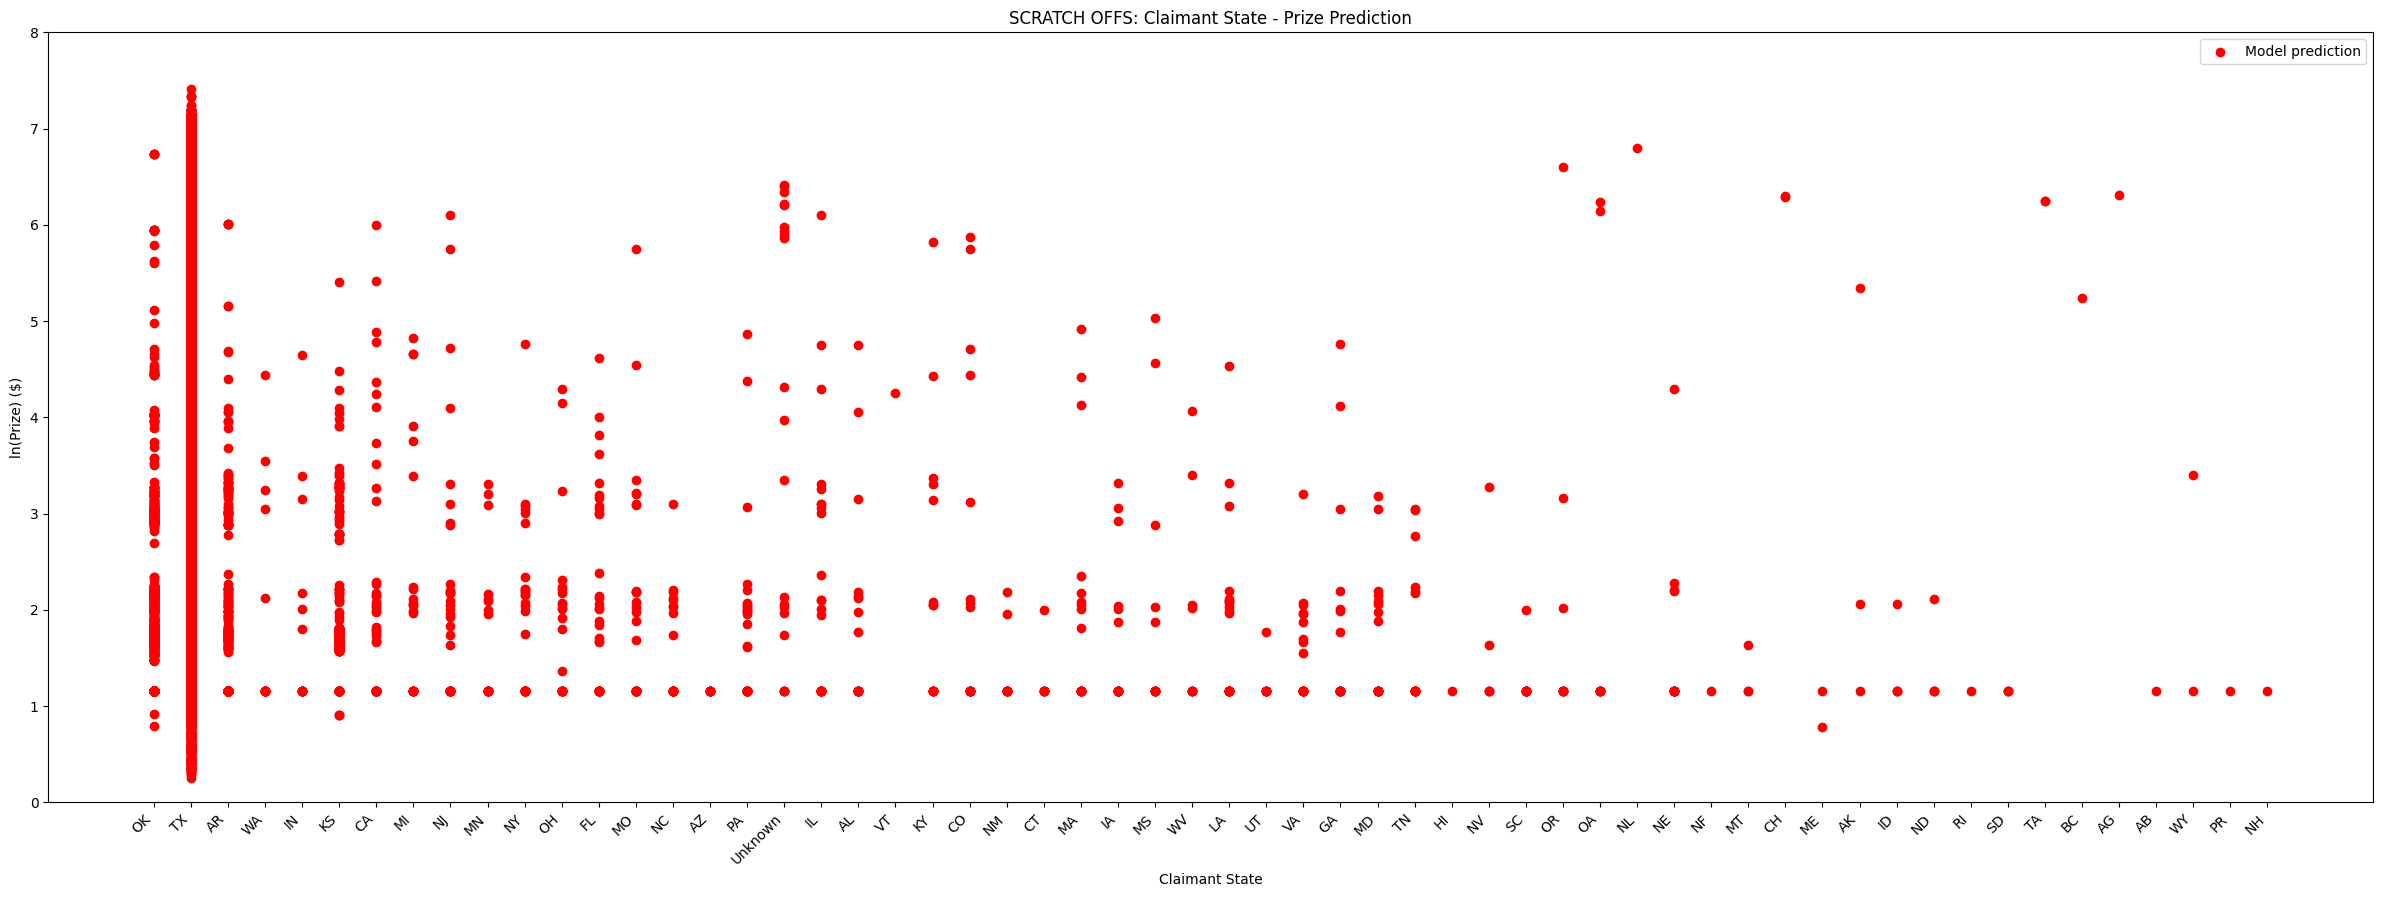

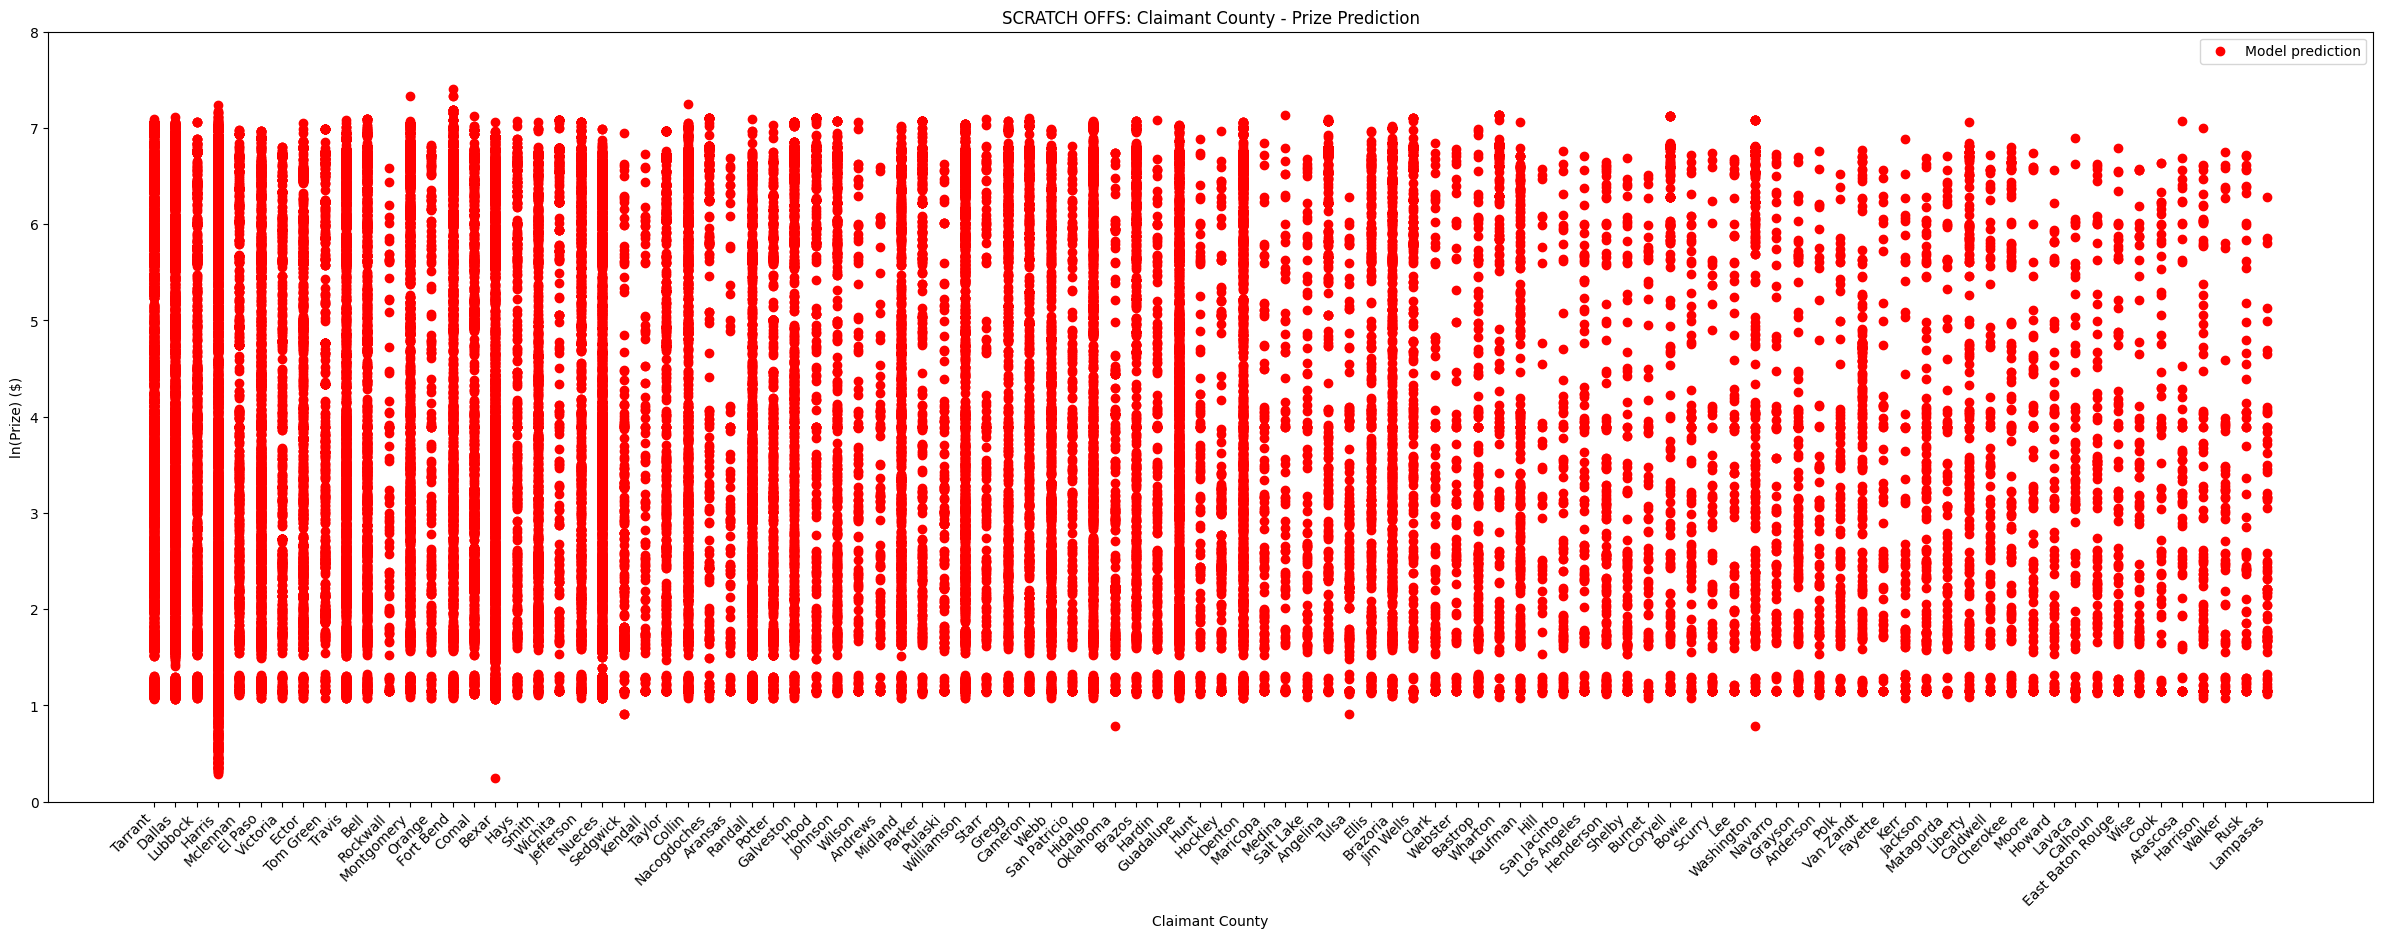

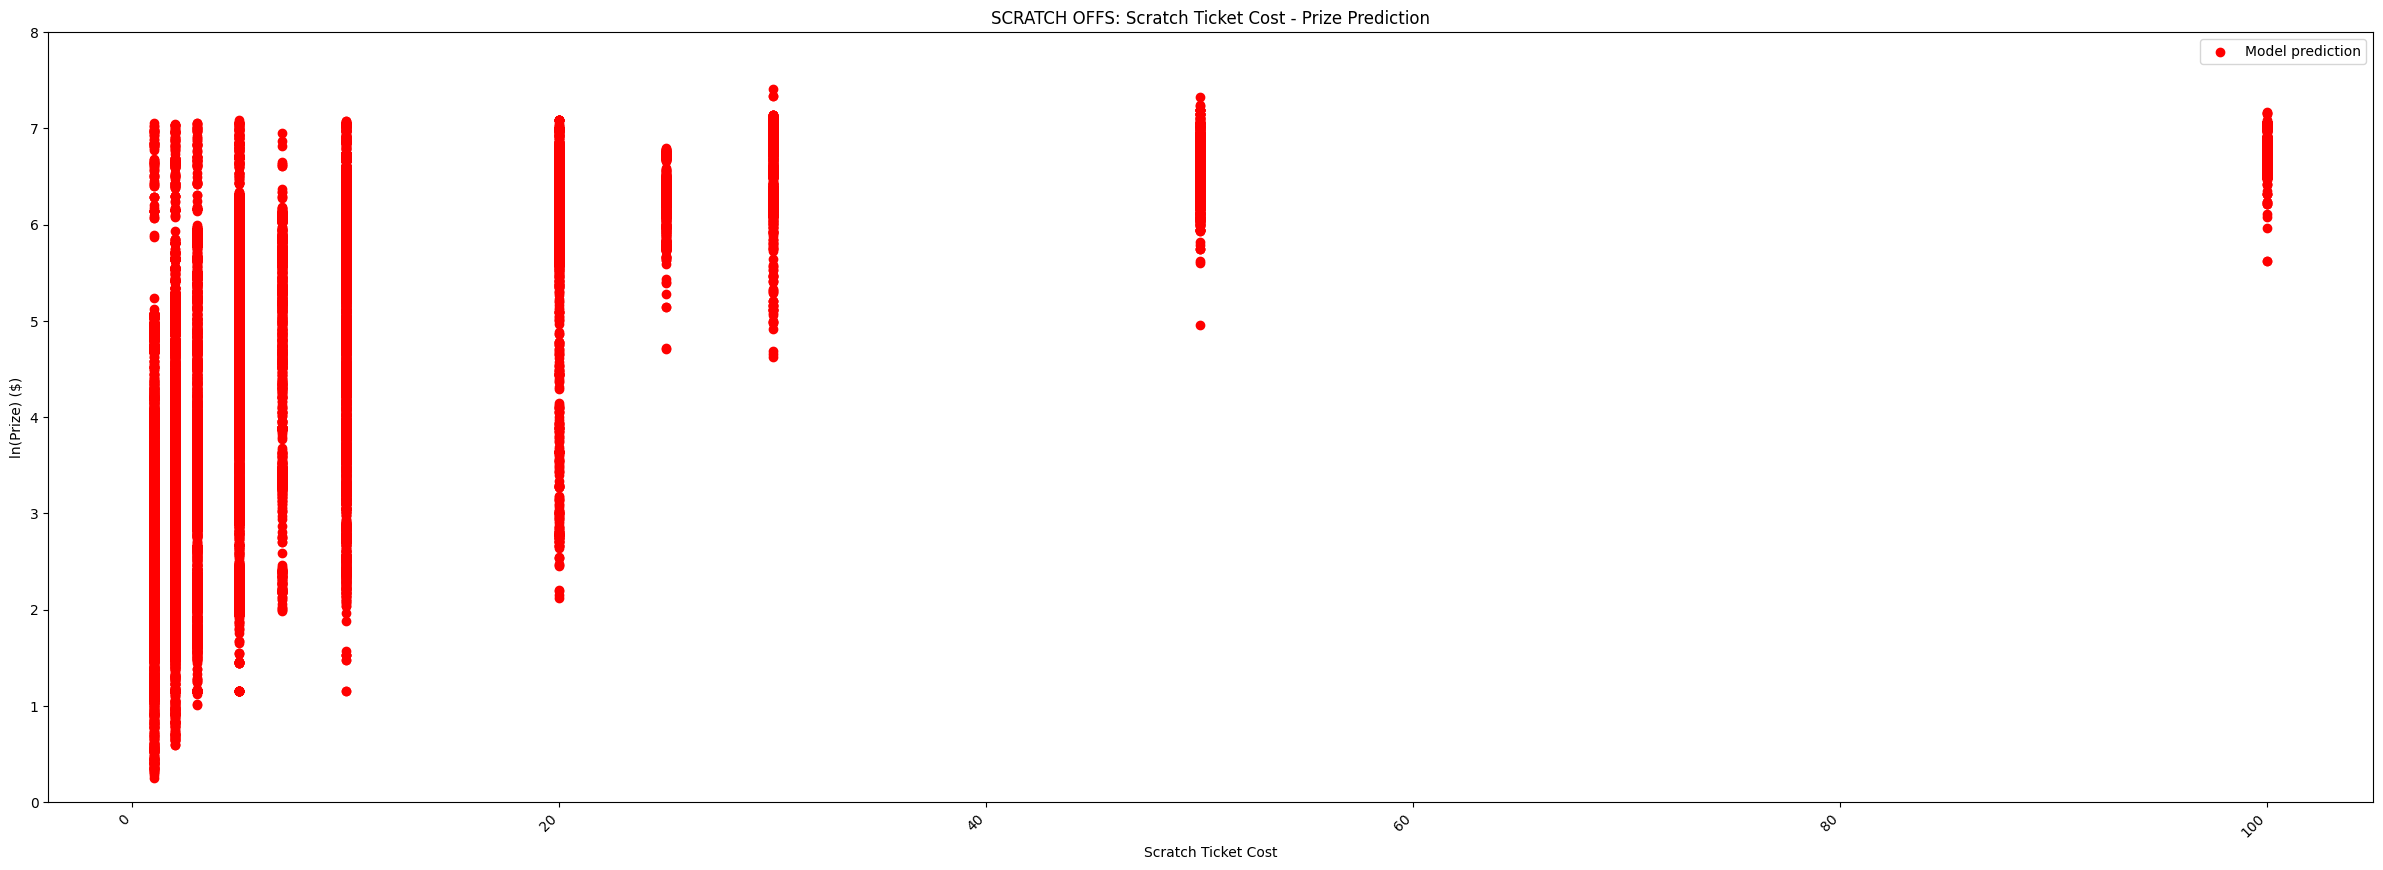

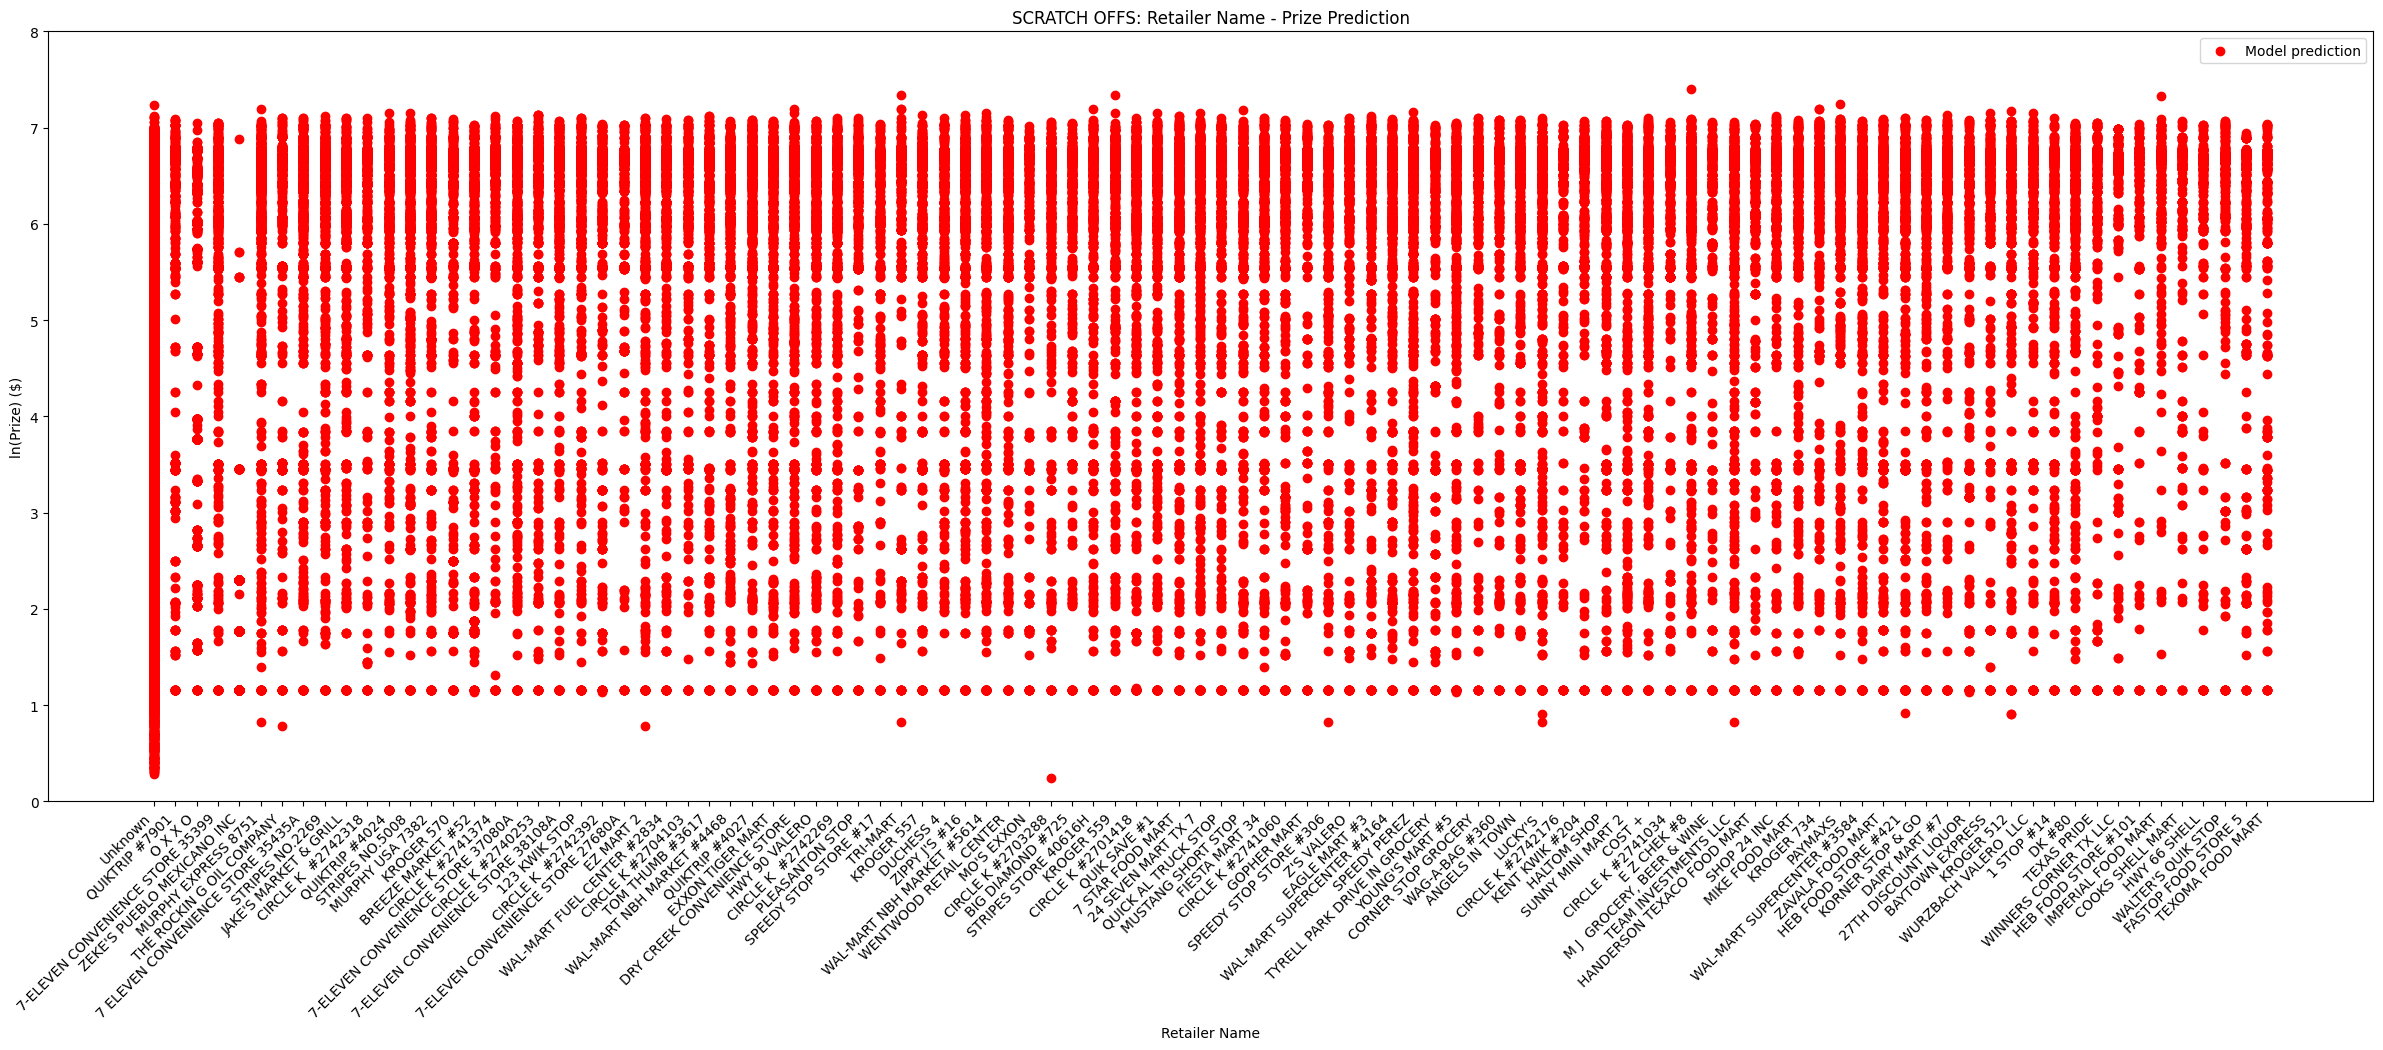

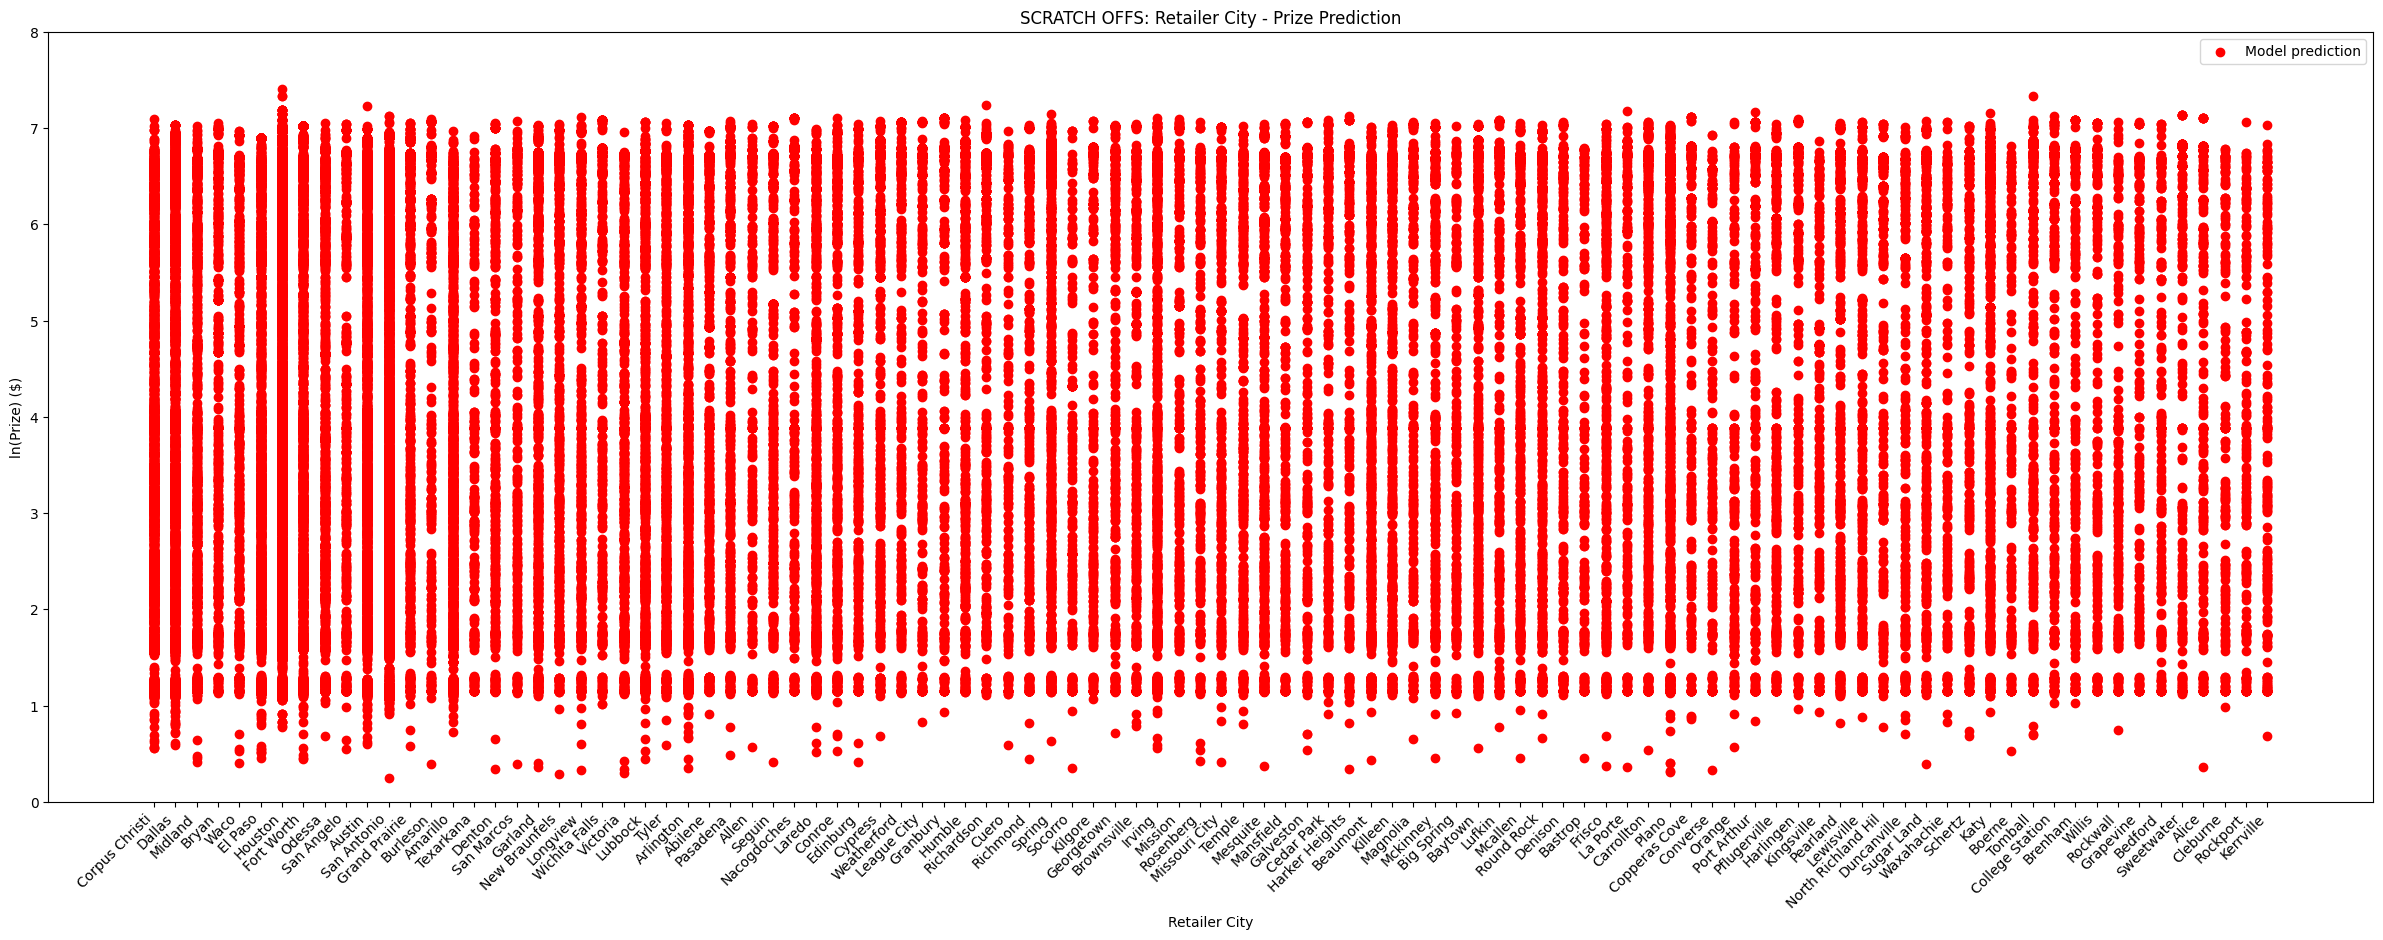

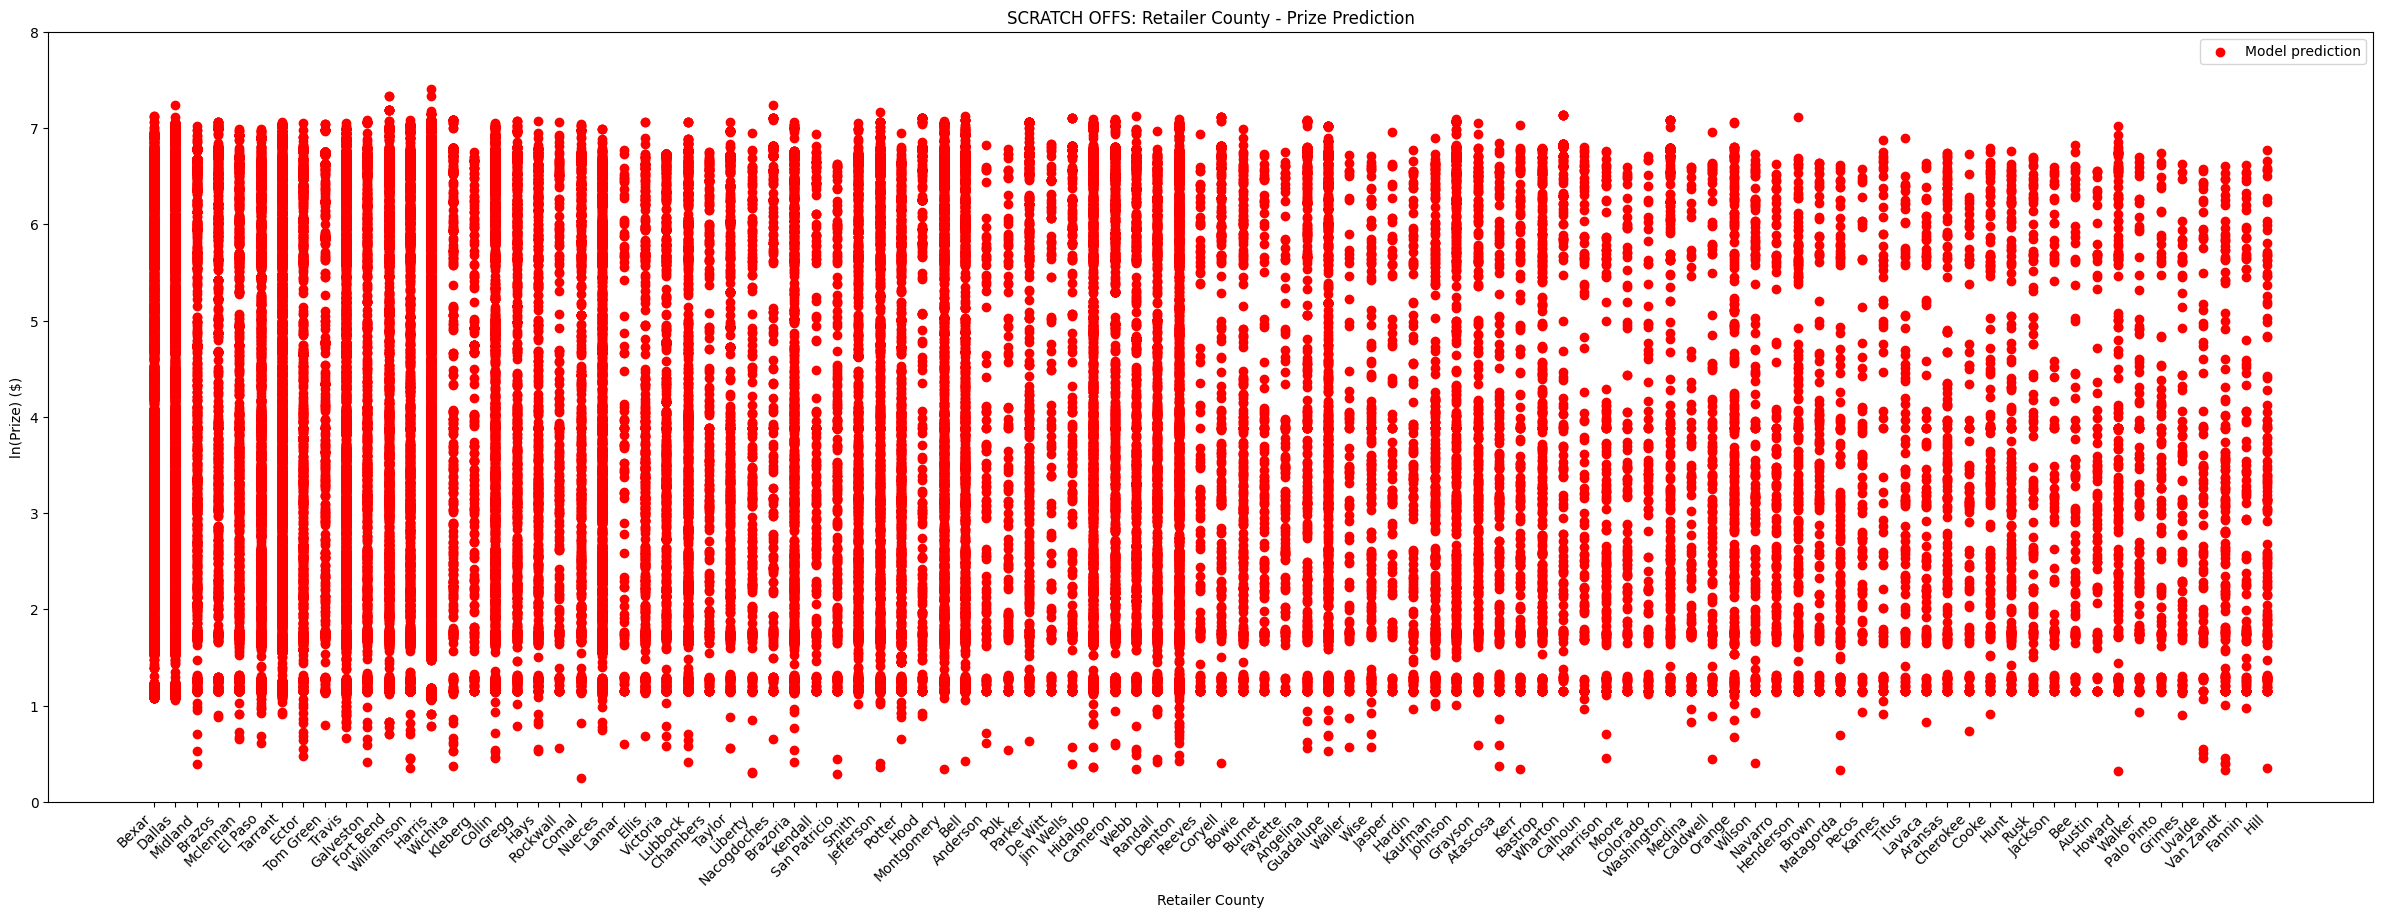

In [29]:
# Visualize the Decision Tree prediction
for column in X_sd.columns:
    plt.figure(figsize=(30, 10))
    plt.scatter(X_sd[column], filtered_y_pred_final_s, color='red', label='Model prediction')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels
    plt.ylim(0, 8)  # Set y limits
    plt.xlabel(column)
    plt.ylabel('ln(Prize) ($)')
    plt.title('SCRATCH OFFS: ' + column + ' - Prize Prediction')
    plt.legend()
    plt.show()

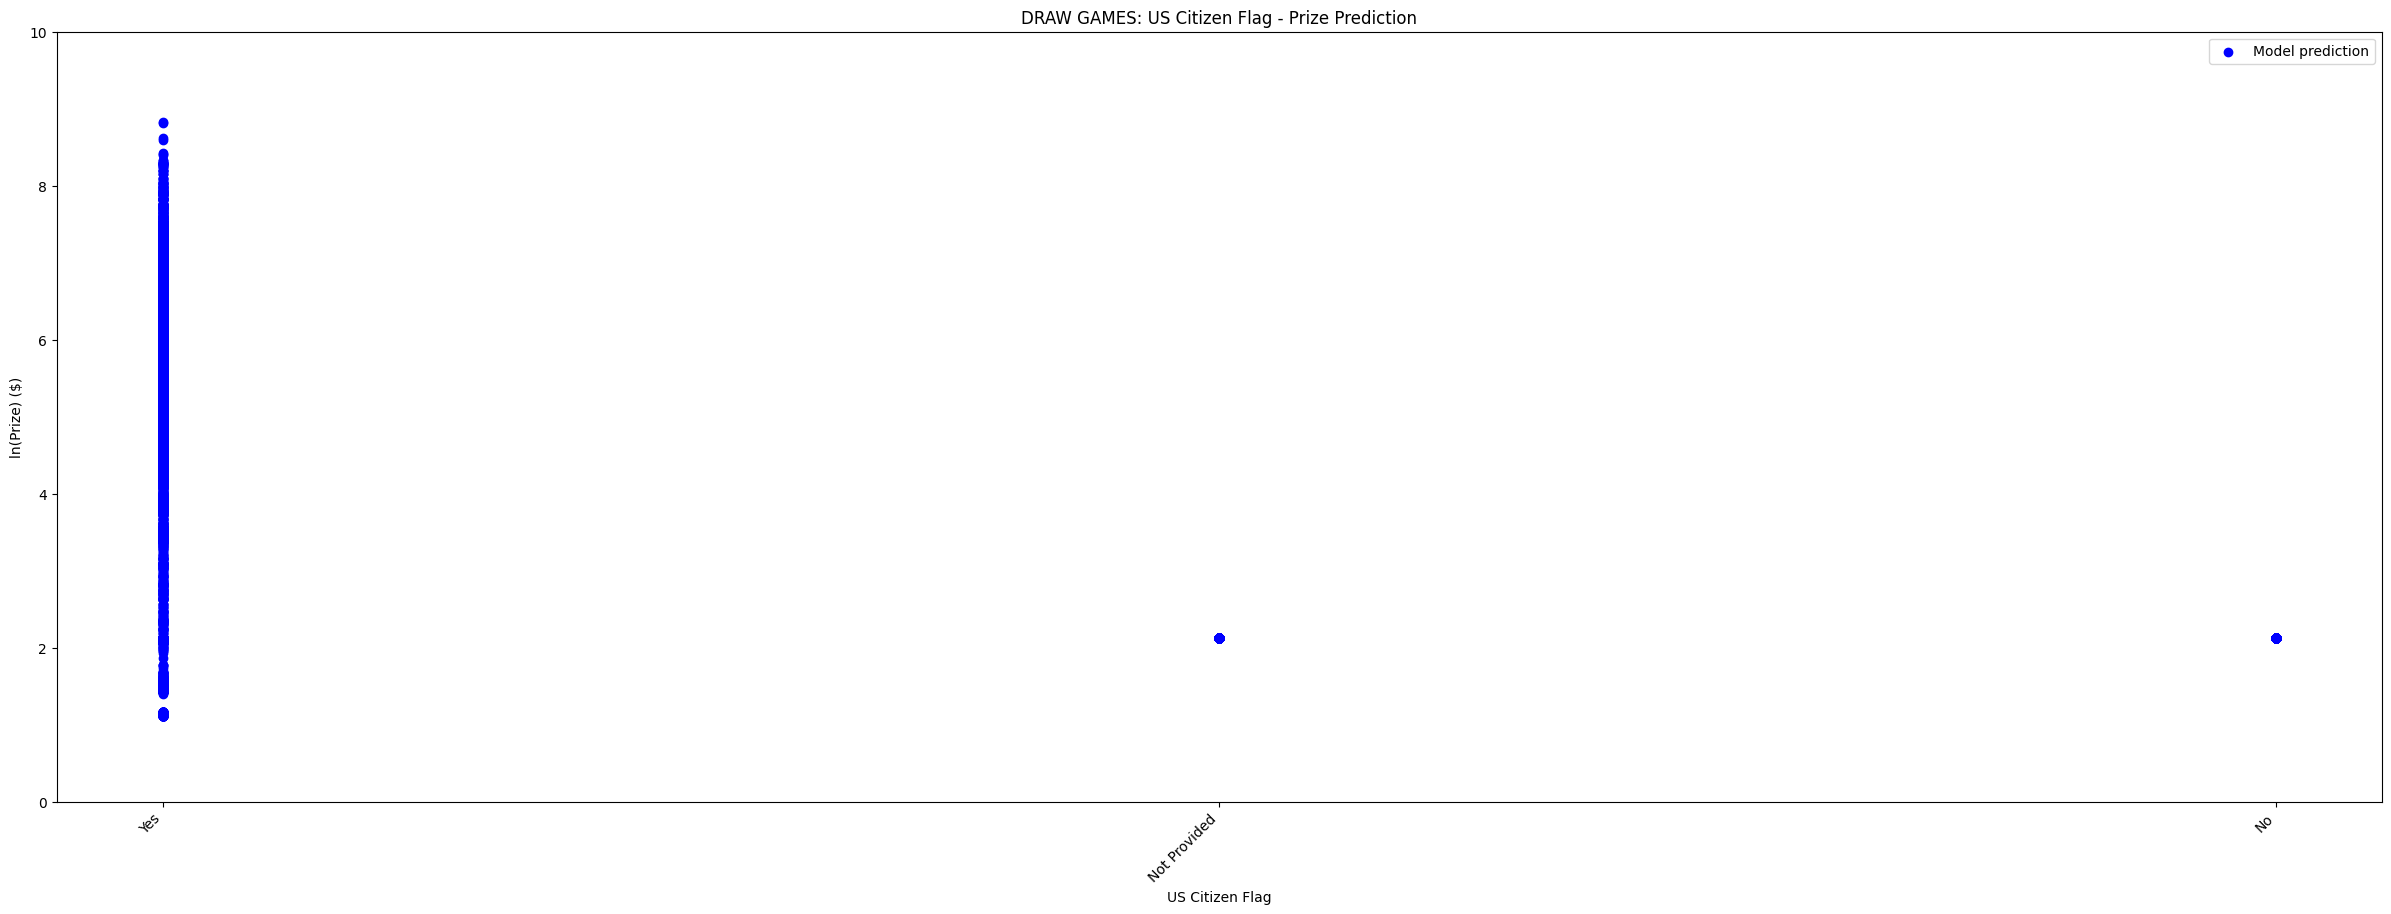

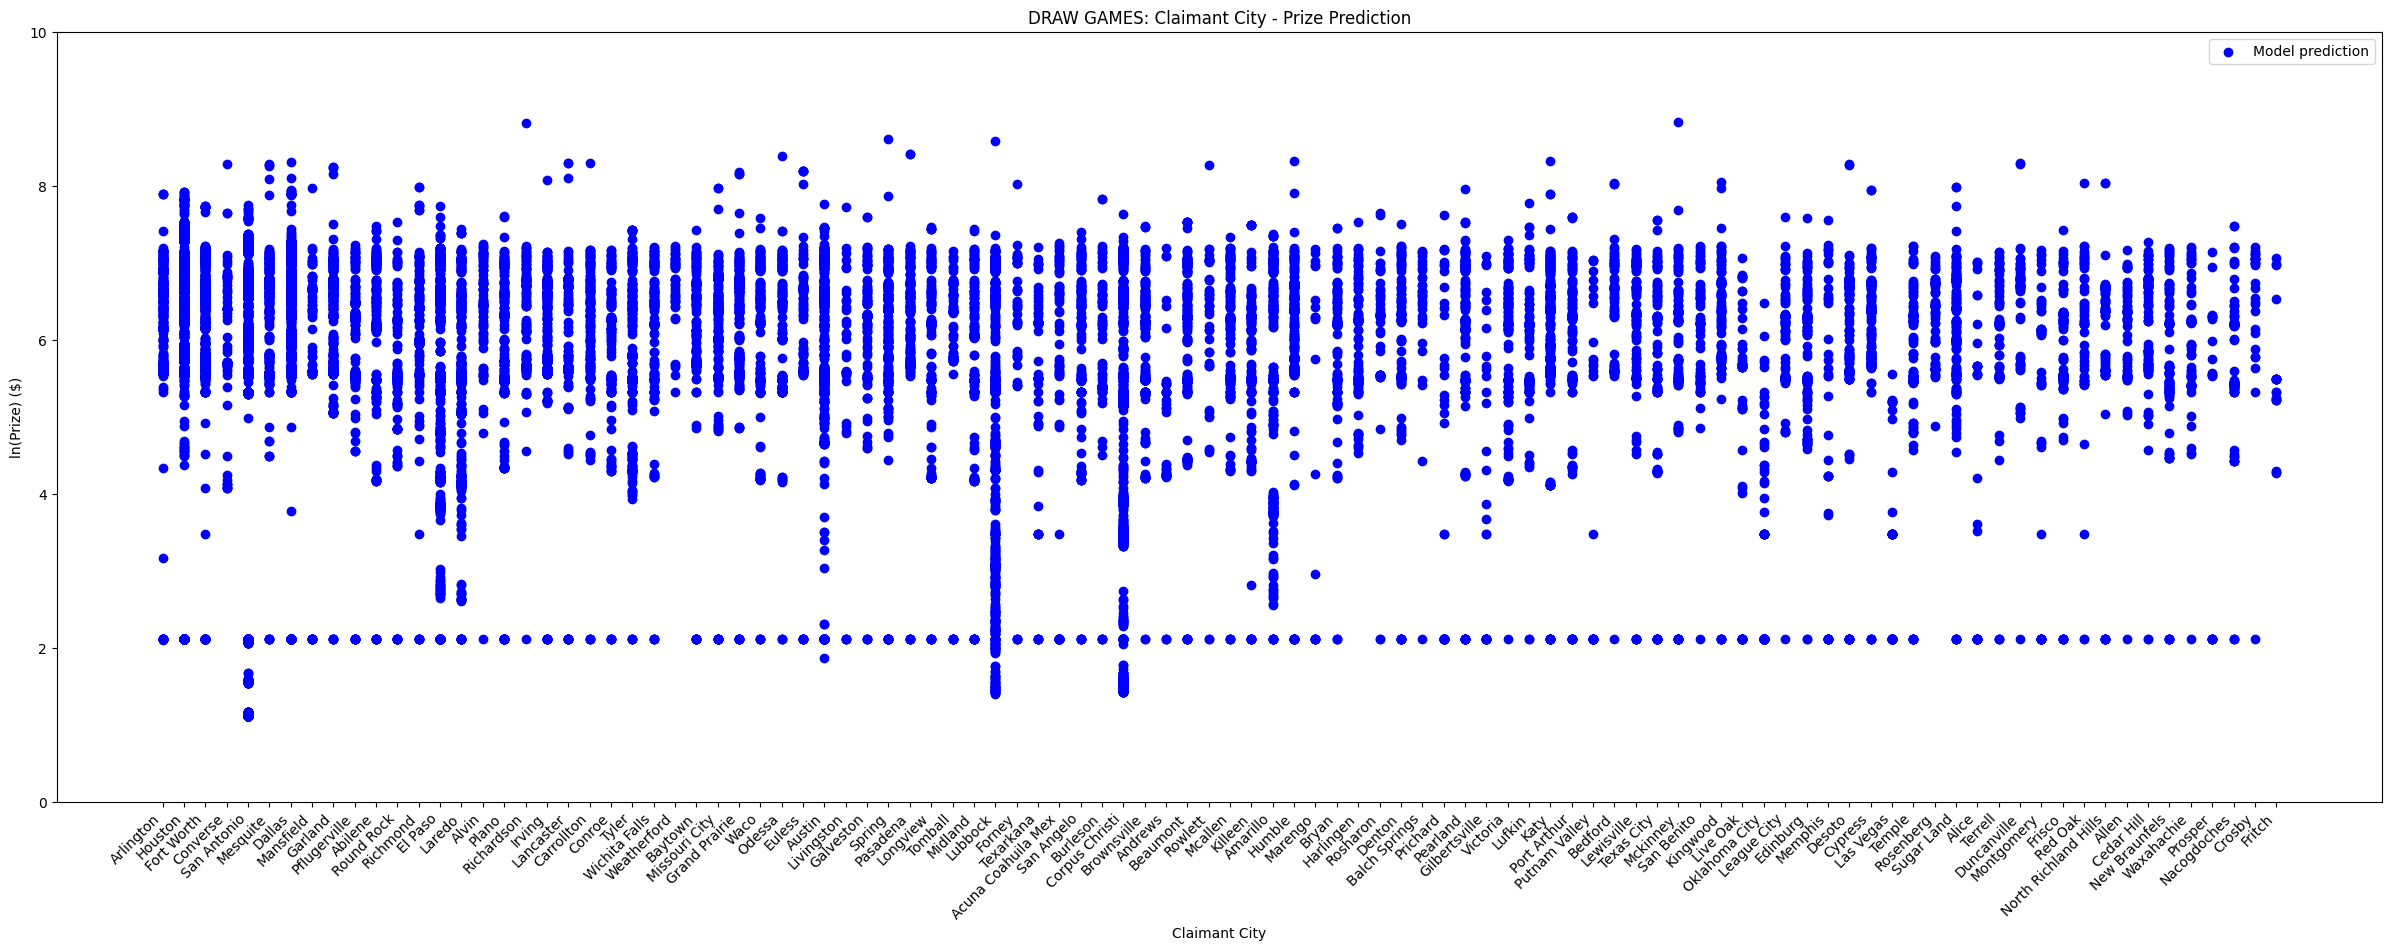

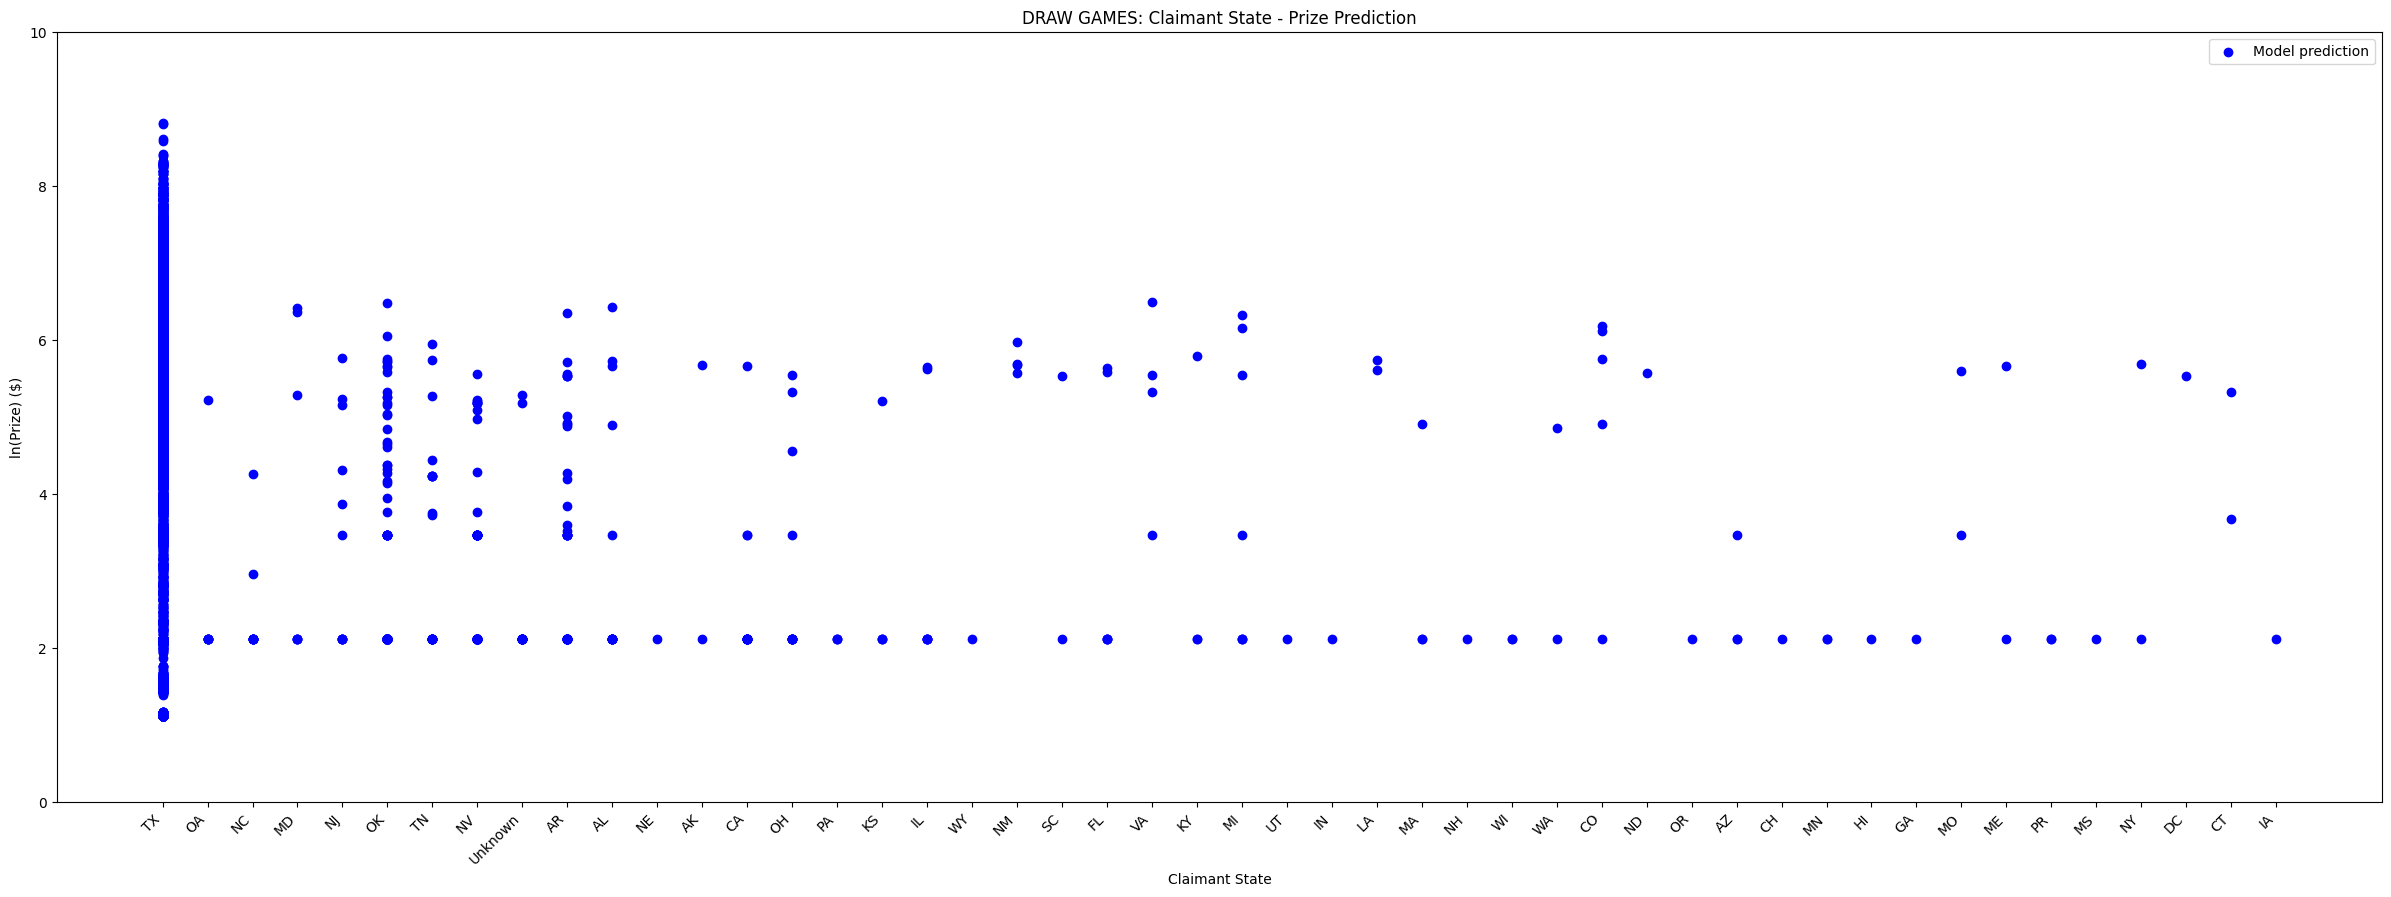

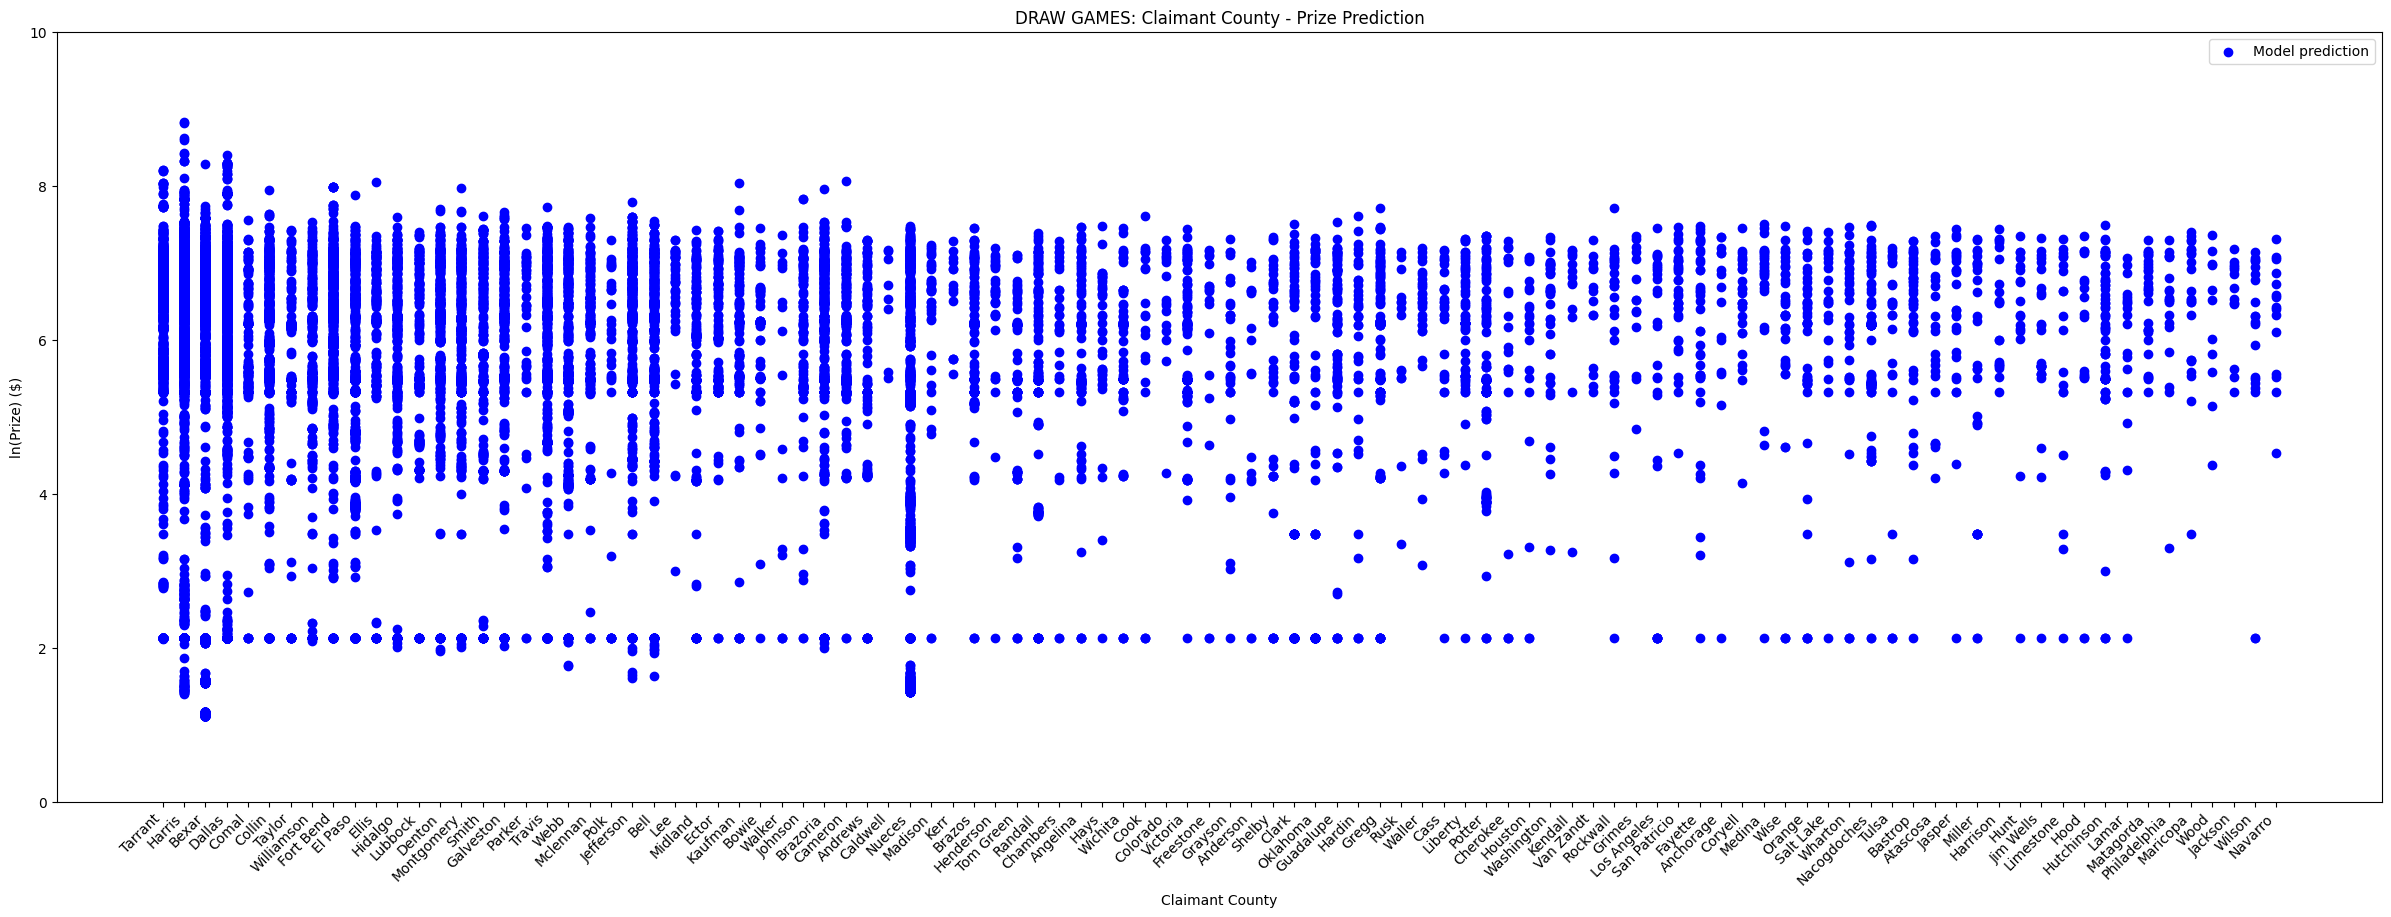

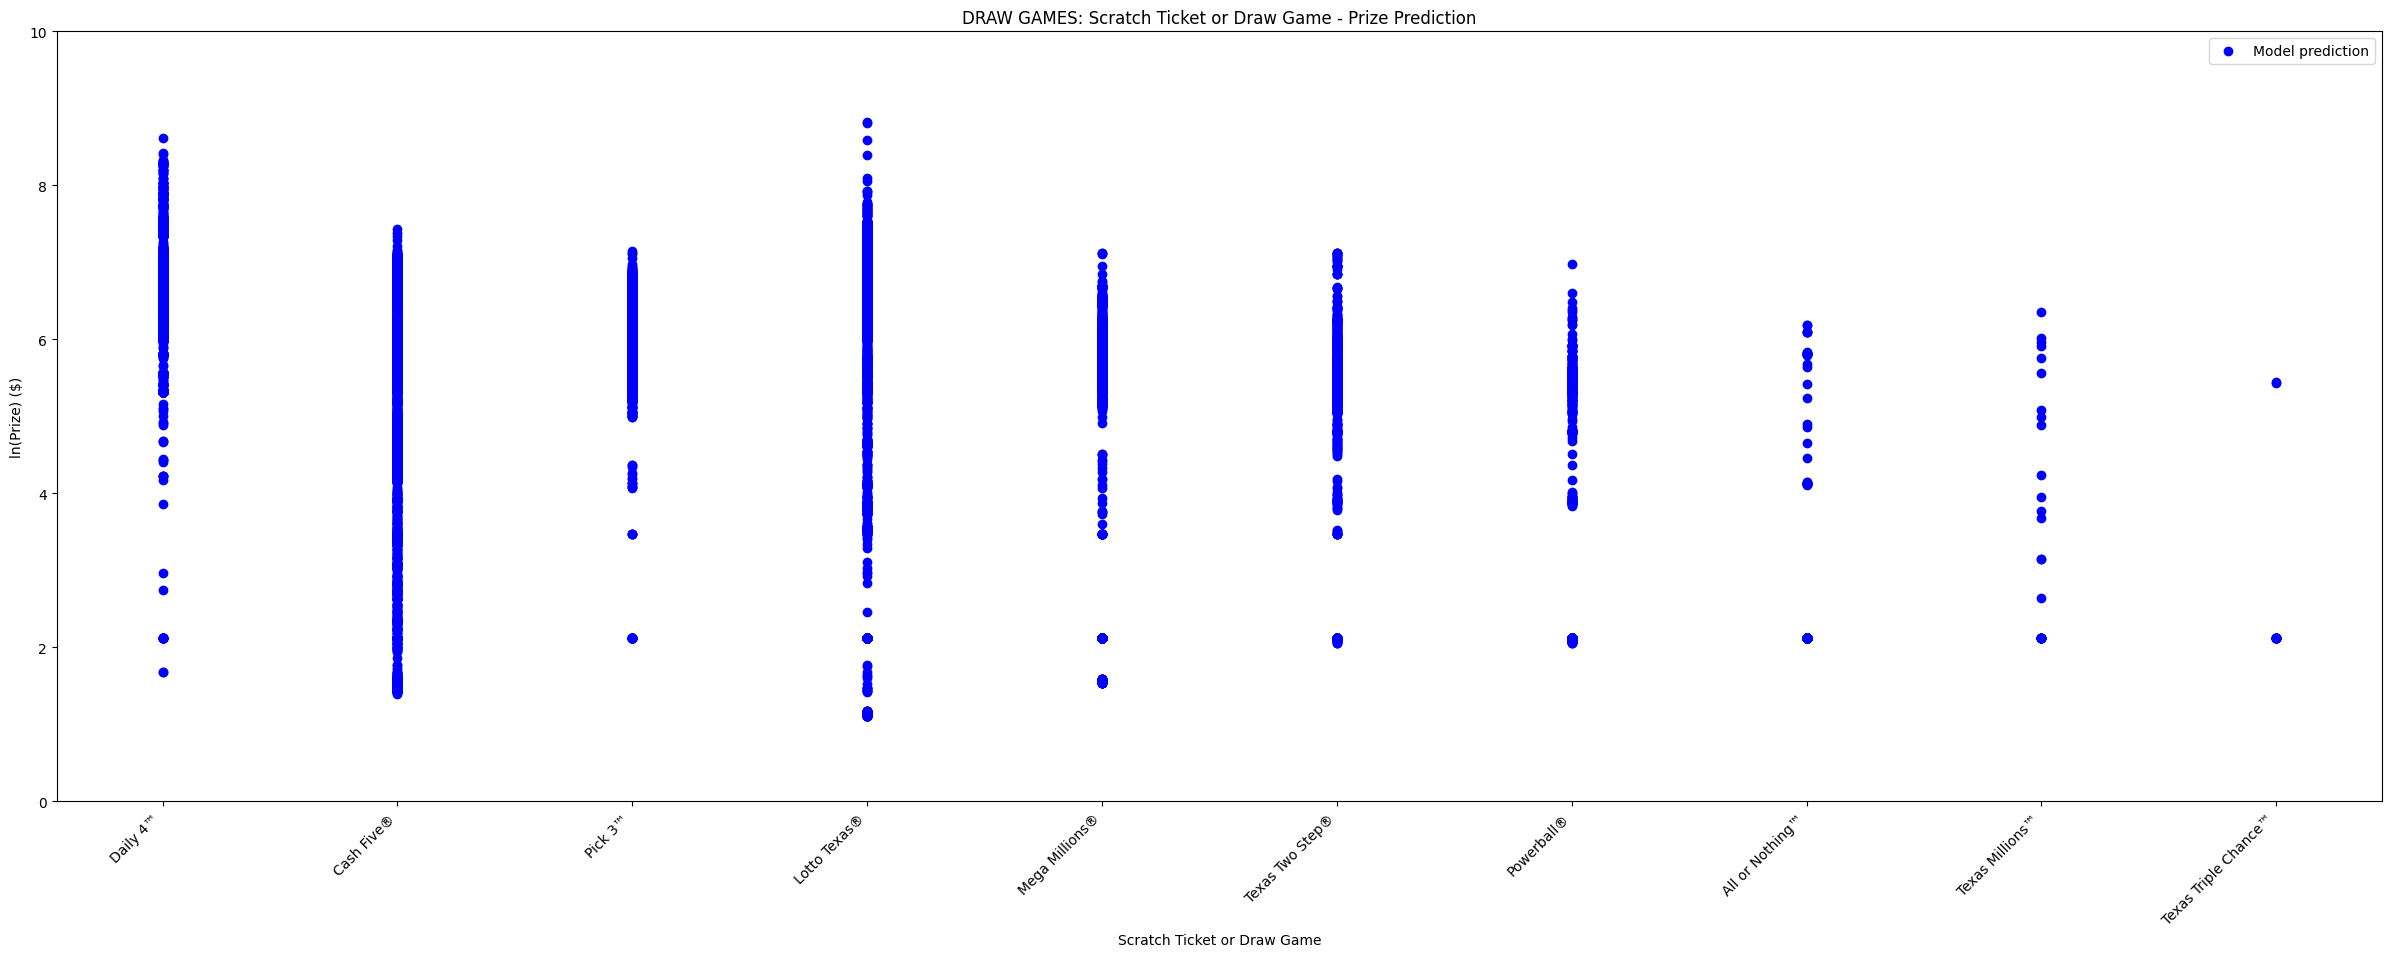

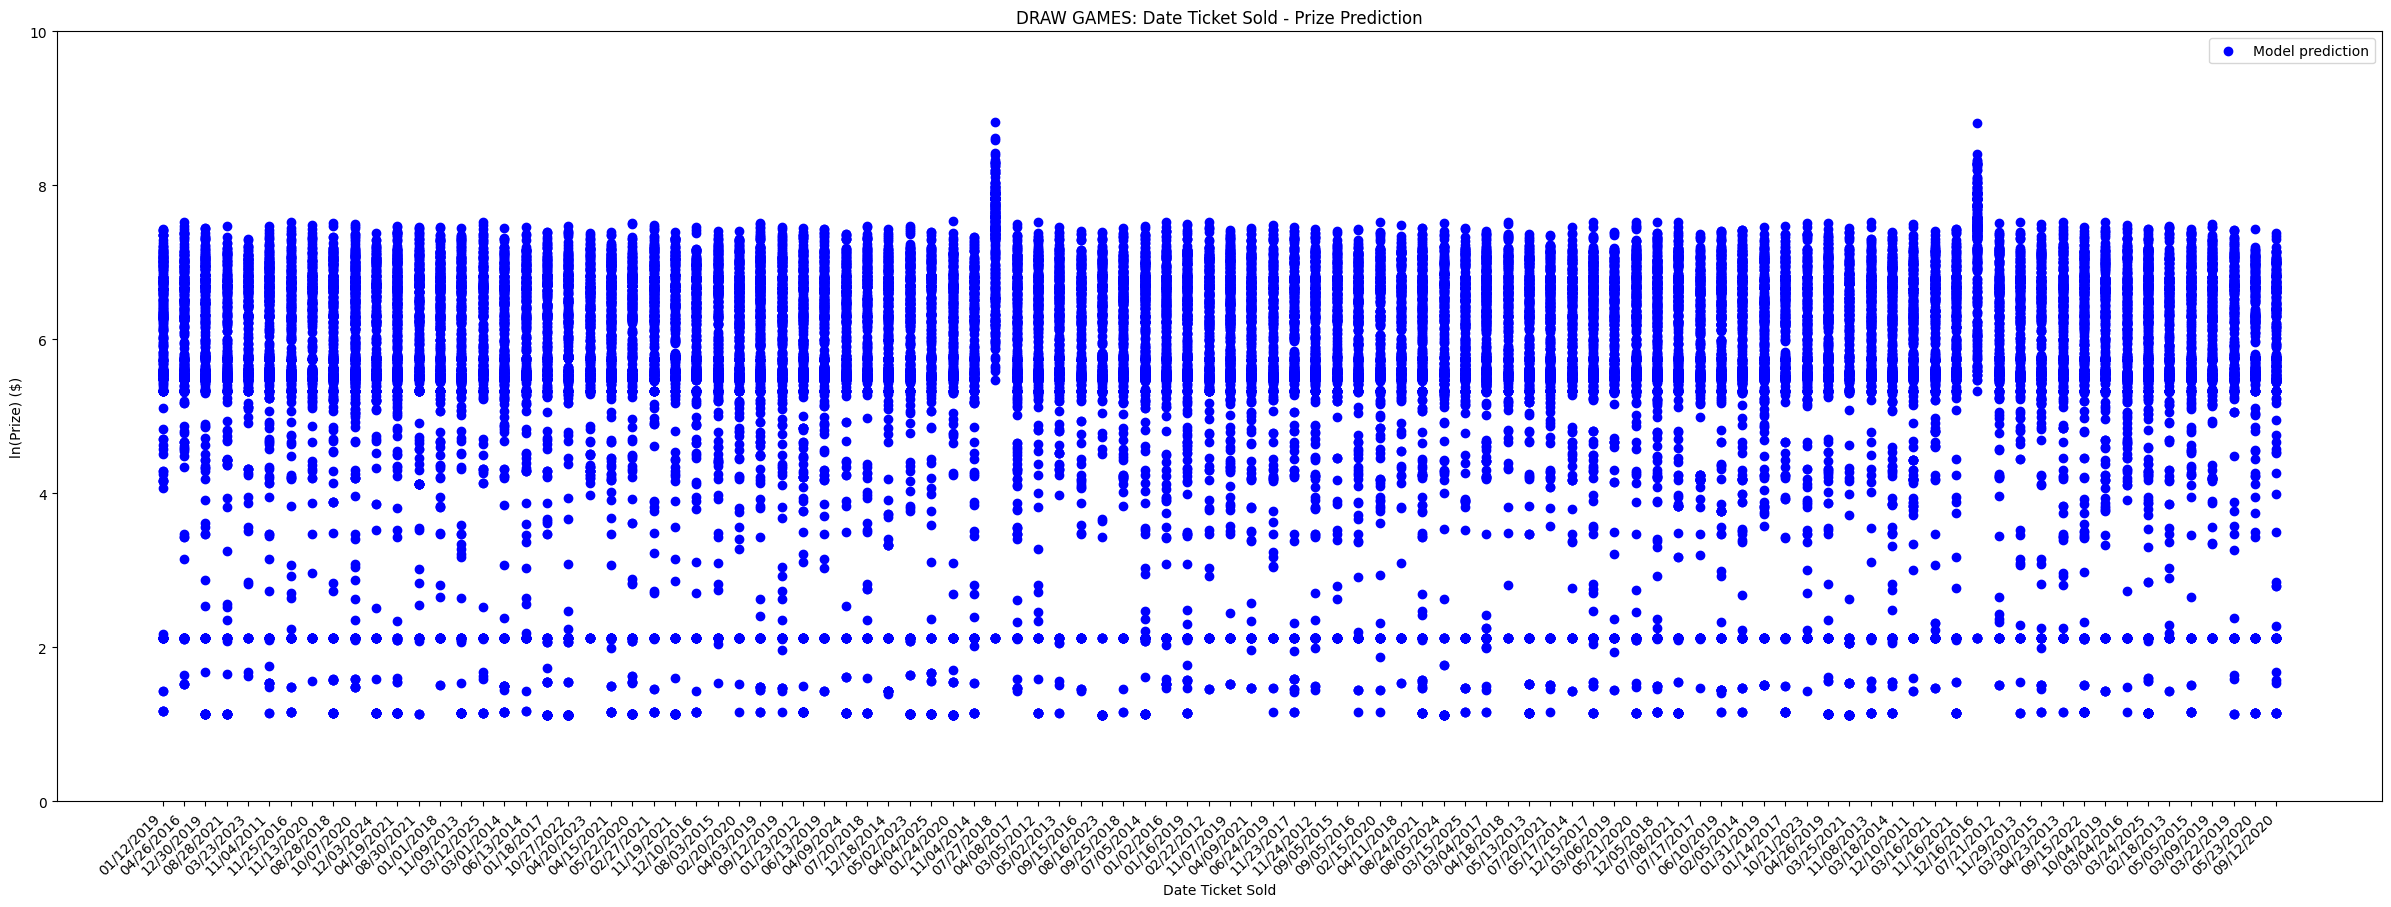

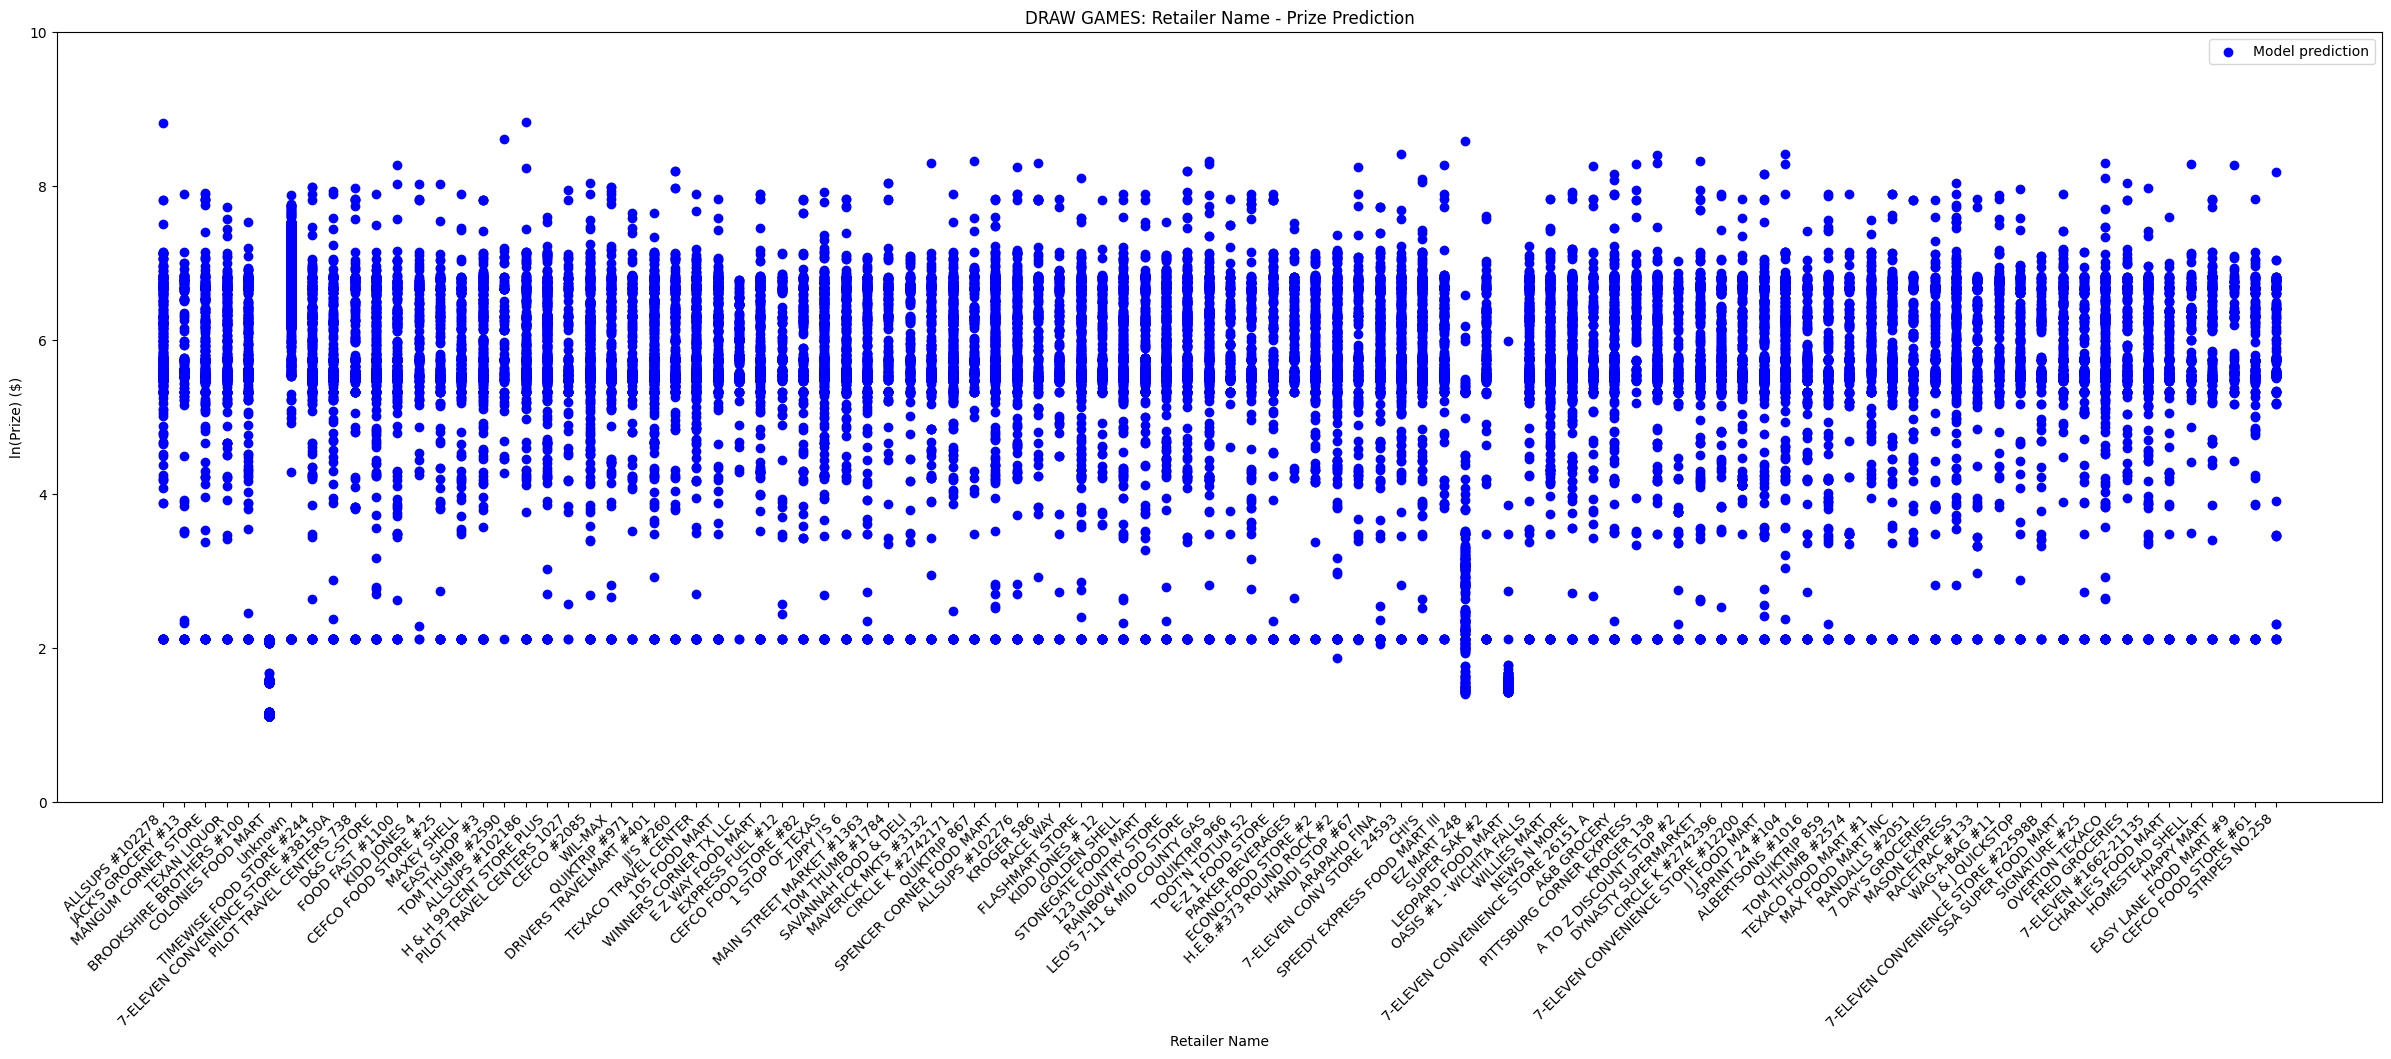

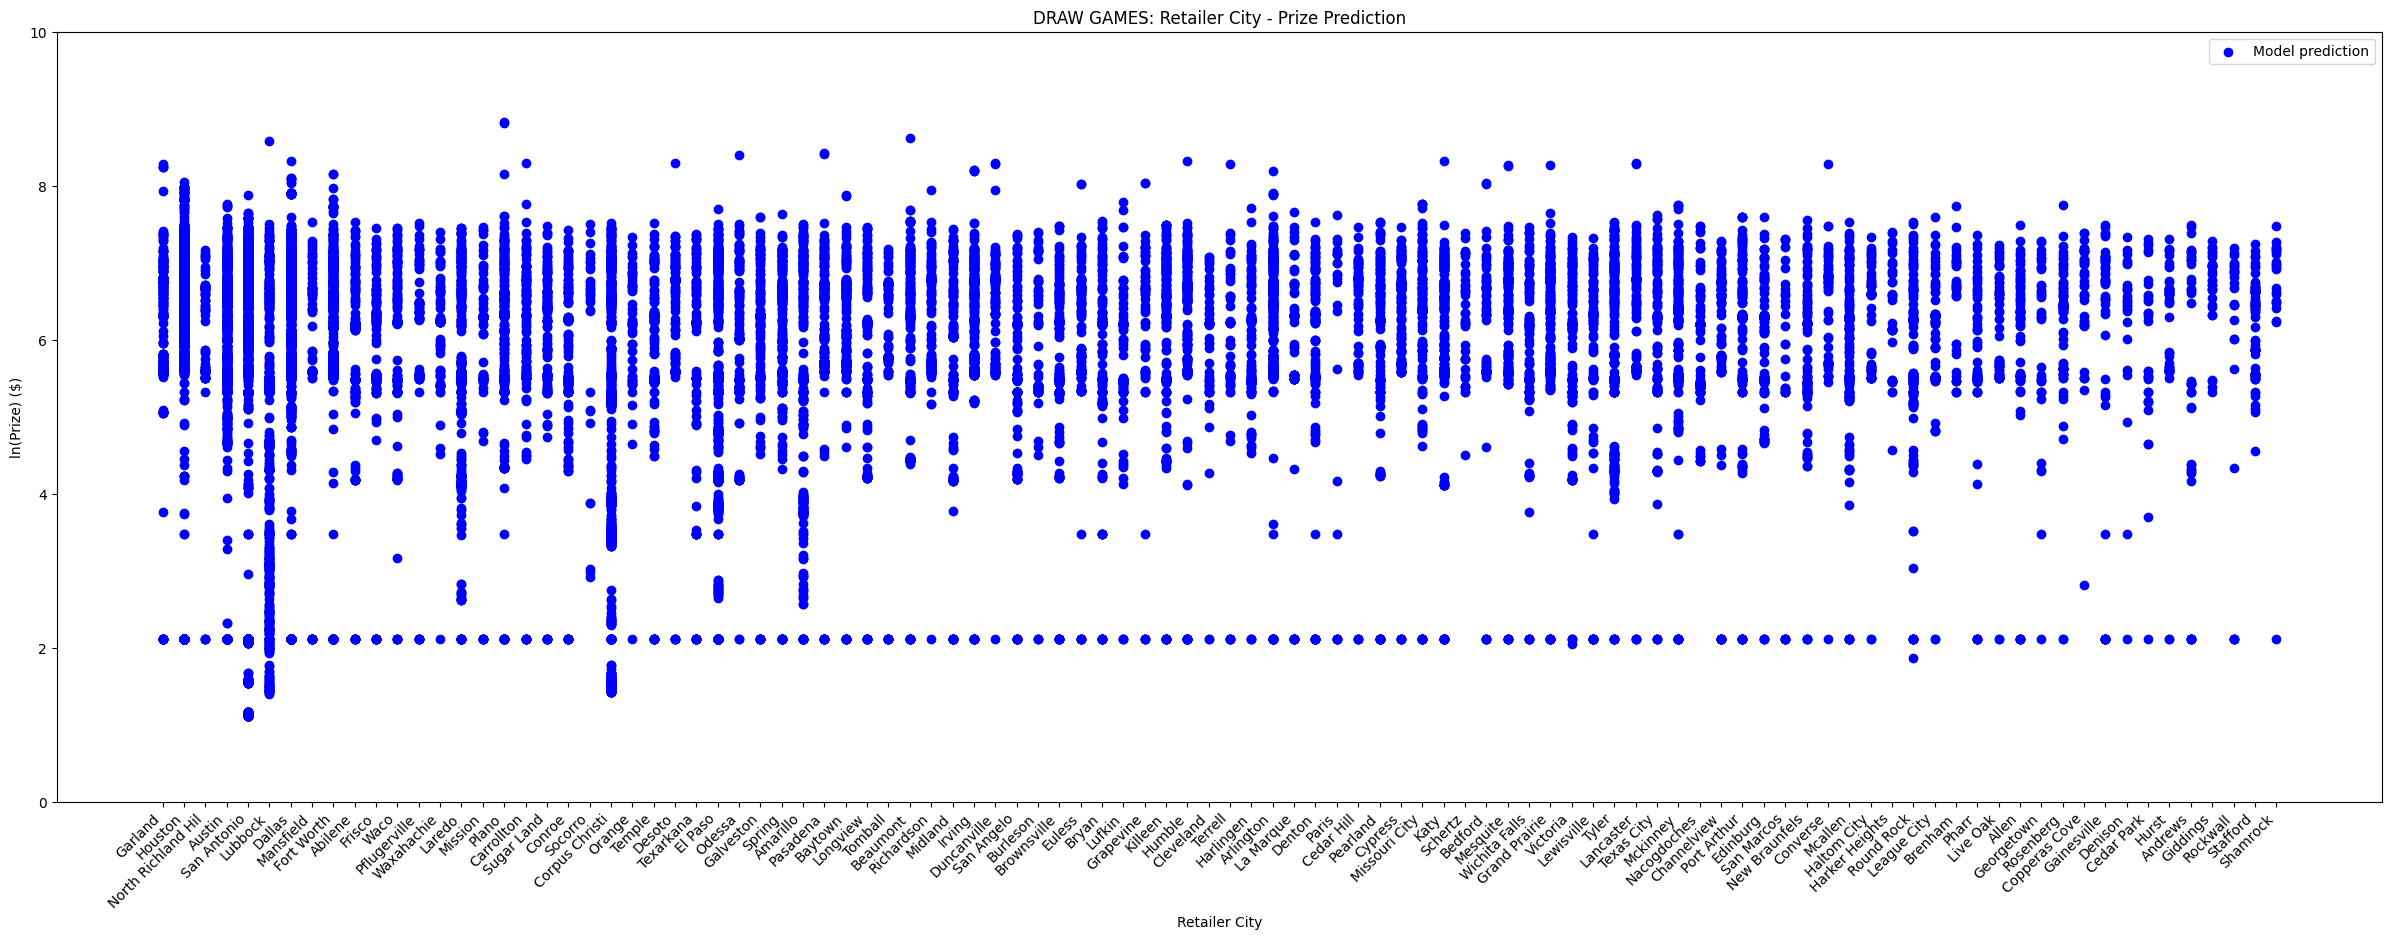

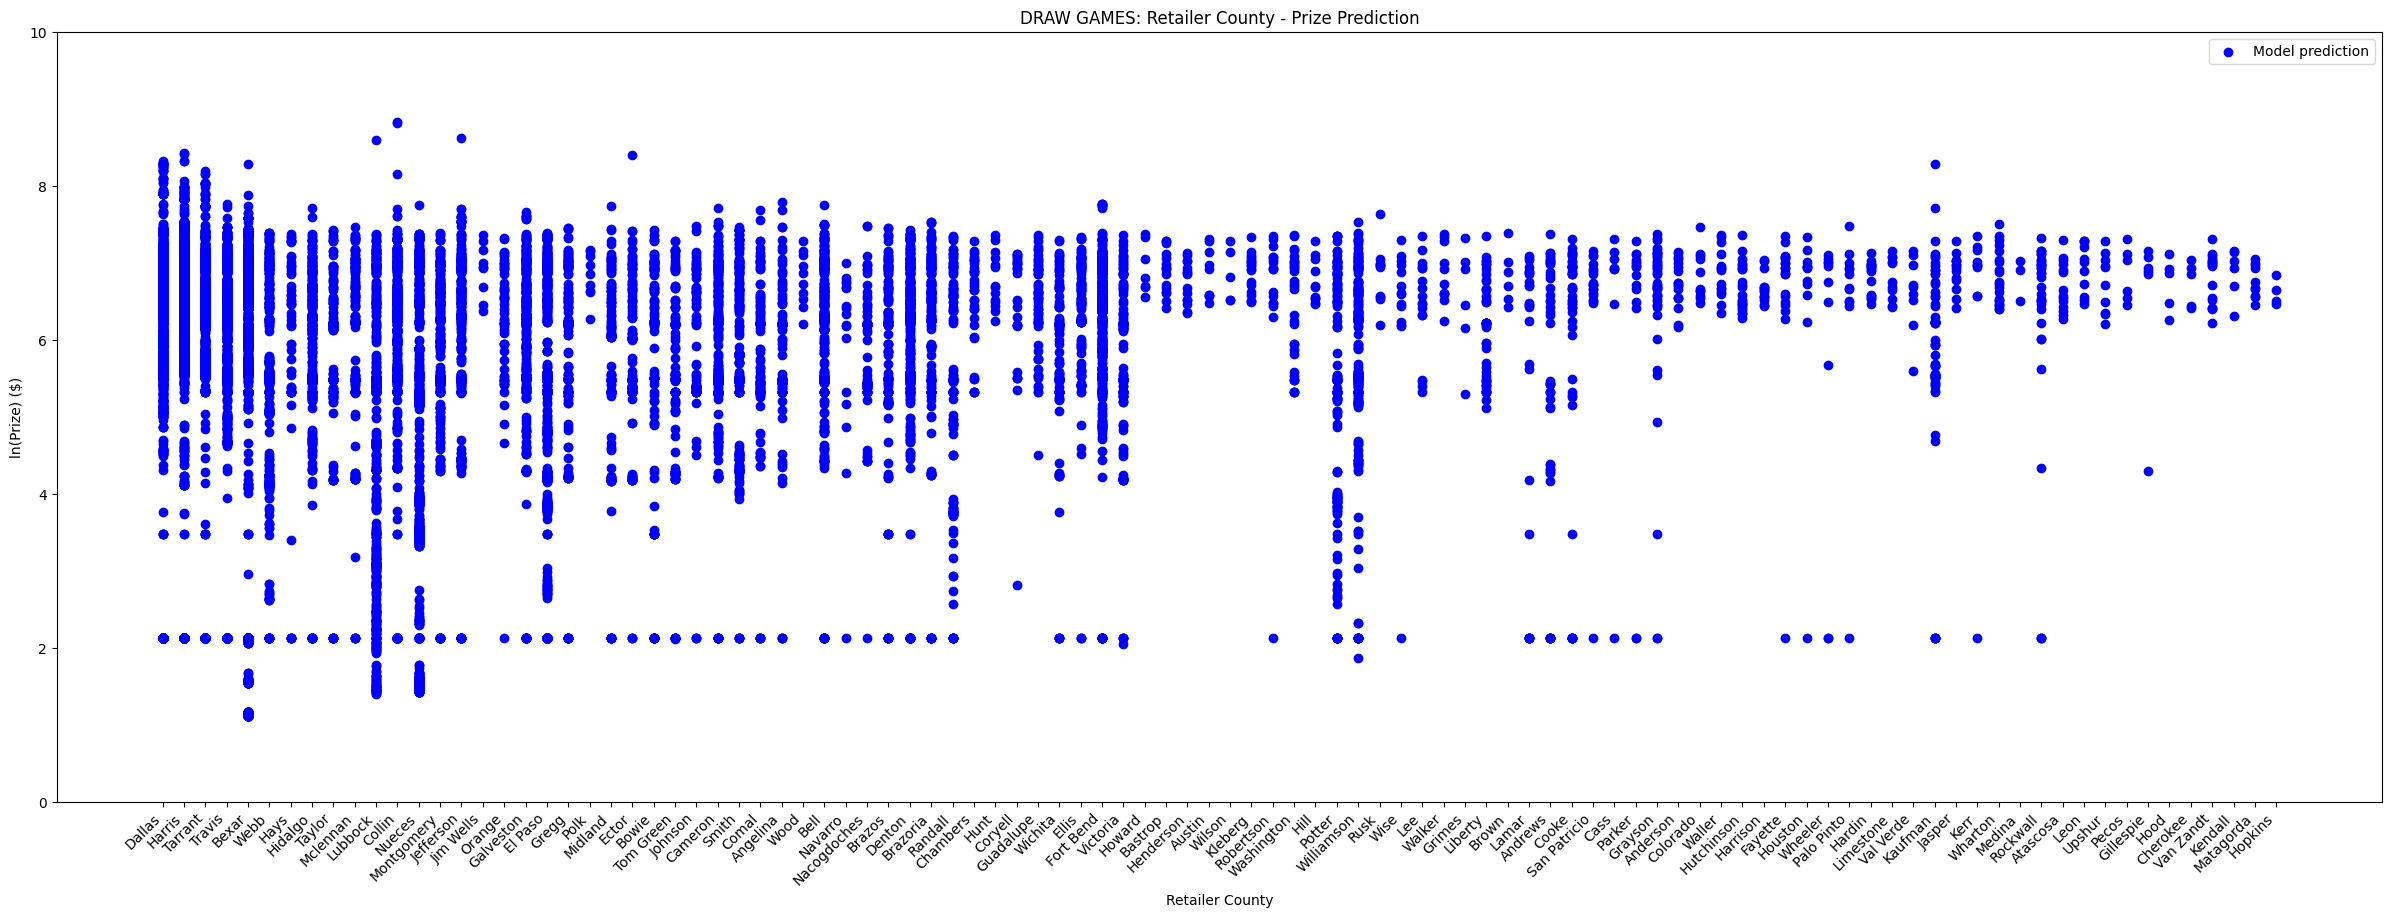

In [30]:
# Visualize the Decision Tree prediction
for column in X_dd.columns:
    plt.figure(figsize=(30, 10))
    plt.scatter(X_dd[column], filtered_y_pred_final_d, color='blue', label='Model prediction')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels
    plt.ylim(0, 10)  # Set y limits
    plt.xlabel(column)
    plt.ylabel('ln(Prize) ($)')
    plt.title('DRAW GAMES: ' + column + ' - Prize Prediction')
    plt.legend()
    plt.show()

#### Evaluation

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# Evaluate the model
mse_s = mean_squared_error(y_slog_final_test, y_pred_final_s)
print(f'Mean Squared Error (Scratch Tickets): {mse_s}')
mse_d = mean_squared_error(y_dlog_final_test, y_pred_final_d)
print(f'Mean Squared Error (Draw Tickets): {mse_d}')

Mean Squared Error (Scratch Tickets): 3.474892342018986
Mean Squared Error (Draw Tickets): 3.209266438045567


In [33]:
r2_score(y_slog_final_test,y_pred_final_s)

0.5563299611953334

In [34]:
r2_score(y_dlog_final_test,y_pred_final_d)

0.45333175470243836

Compared to the baseline model which had

Mean Squared Error (Scratch Tickets): 6797993679.177734

Mean Squared Error (Draw Tickets): 916669140074.7631

and

R² (Coefficient of Determination) for Scratch Tickets: -0.5941053516746091

R² (Coefficient of Determination) for Draw Games: -0.39793976512438234

The neural network model has much less mean squared error and a much better r squared score which shows that the neural network predicts the dataset much better than the baseline model

#### Interpretation

Tallying up the total prizes in each category and dividing them by the count to see which demographic yields the highest average prize

The neural network didn't produce any outstanding outliers so using average as a benchmark is safe

In [67]:
for column in X_sd.columns:
    # Ensure the data is 1-dimensional
    Xs_column = X_sd[column].ravel() 
    ys_values = np.exp(filtered_y_pred_final_s).ravel()  # undo log transformation

    # Combine them into a DataFrame
    dfs = pd.DataFrame({
        column: Xs_column,
        'y_values': ys_values
    })

    # Group by 'US Citizen Flag' and calculate the sum of 'y_values' and count the occurrences
    groupeds = dfs.groupby(column).agg(
        Total_Prize=('y_values', 'sum'),
        count=('y_values', 'size')
    )

    # Calculate the average (total y / count)
    groupeds['Average_Prize'] = groupeds['Total_Prize'] / groupeds['count']

    # Print the results
    print(groupeds)

    # Find the category with the highest count
    max_count_categorys = groupeds['count'].idxmax()  # Get the category with max count
    max_countss = groupeds.loc[max_count_categorys, 'count']
    max_average_prizes = groupeds.loc[max_count_categorys, 'Average_Prize']

    print(f"\nCategory with highest count for {column}:")
    print(f"Category: {max_count_categorys} | Count: {max_countss} | Average Prize: ${max_average_prizes:.2f}\n")

    # Sort the grouped data by 'Average_Prize' in descending order for the top 3 max
    top_3_max_s = groupeds.nlargest(3, 'Average_Prize')

    # Sort the grouped data by 'Average_Prize' in ascending order for the bottom 3 min
    bottom_3_min_s = groupeds.nsmallest(3, 'Average_Prize')

    # Print the results along with their indices (IDs)
    print("Top 3 Maximum Average Prize")
    for idx, row in top_3_max_s.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\nBot 3 Minimum Average Prize")
    for idx, row in bottom_3_min_s.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\n\n")

                  Total_Prize   count  Average_Prize
US Citizen Flag                                     
No               1.004193e+06    1256     799.516570
Not Provided     5.311468e+04   10067       5.276118
Yes              3.522909e+07  104636     336.682327

Category with highest count for US Citizen Flag:
Category: Yes | Count: 104636 | Average Prize: $336.68

Top 3 Maximum Average Prize
No            Average Prize: $799.5165704617834 Count: 1256
Yes           Average Prize: $336.6823273060897 Count: 104636
Not Provided  Average Prize: $5.276117978295421 Count: 10067

Bot 3 Minimum Average Prize
Not Provided  Average Prize: $5.276117978295421 Count: 10067
Yes           Average Prize: $336.6823273060897 Count: 104636
No            Average Prize: $799.5165704617834 Count: 1256



                 Total_Prize  count  Average_Prize
Claimant City                                     
Abilene        421963.375000   1065     396.209742
Albuequerque    11318.817383    176      64.311462

In [65]:
for column in X_dd.columns:
    # Ensure the data is 1-dimensional
    Xd_column = X_dd[column].ravel() 
    yd_values = np.exp(filtered_y_pred_final_d).ravel()  # undo log transformation

    # Combine them into a DataFrame
    dfd = pd.DataFrame({
        column: Xd_column,
        'y_values': yd_values
    })

    # Group by 'US Citizen Flag' and calculate the sum of 'y_values' and count the occurrences
    groupedd = dfd.groupby(column).agg(
        Total_Prize=('y_values', 'sum'),
        count=('y_values', 'size')
    )

    # Calculate the average (total y / count)
    groupedd['Average_Prize'] = groupedd['Total_Prize'] / groupedd['count']

    # Print the results
    print(groupedd)

     # Find the category with the highest count
    max_count_categoryd = groupedd['count'].idxmax()  # Get the category with max count
    max_countd = groupedd.loc[max_count_categoryd, 'count']
    max_average_prized = groupedd.loc[max_count_categoryd, 'Average_Prize']

    print(f"\nCategory with highest count for {column}:")
    print(f"Category: {max_count_categoryd} | Count: {max_countd} | Average Prize: ${max_average_prized:.2f}\n")

    # Sort the grouped data by 'Average_Prize' in descending order for the top 3 max
    top_3_max_d = groupedd.nlargest(3, 'Average_Prize')

    # Sort the grouped data by 'Average_Prize' in ascending order for the bottom 3 min
    bottom_3_min_d = groupedd.nsmallest(3, 'Average_Prize')

    # Print the results along with their indices (IDs)
    print("Top 3 Maximum Average Prize")
    for idx, row in top_3_max_d.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\nBot 3 Minimum Average Prize")
    for idx, row in bottom_3_min_d.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\n\n")

                  Total_Prize  count  Average_Prize
US Citizen Flag                                    
No               1.318857e+03    158       8.347193
Not Provided     9.065053e+03   1086       8.347194
Yes              1.802499e+07  31554     571.242568

Category with highest count for US Citizen Flag:
Category: Yes | Count: 31554 | Average Prize: $571.24

Top 3 Maximum Average Prize
Yes           Average Prize: $571.2425682956202 Count: 31554
Not Provided  Average Prize: $8.34719404638582 Count: 1086
No            Average Prize: $8.34719346444818 Count: 158

Bot 3 Minimum Average Prize
No            Average Prize: $8.34719346444818 Count: 158
Not Provided  Average Prize: $8.34719404638582 Count: 1086
Yes           Average Prize: $571.2425682956202 Count: 31554



                      Total_Prize  count  Average_Prize
Claimant City                                          
Abilene             140699.828125    260     541.153185
Acuna Coahuila Mex   39080.675781    100     390.80

HIGHEST AVERAGE WINNINGS PER CATEGORY (SCRATCH)

Not a US Citizen

From Magnolia, Granbury, or Harker Heights City

From Nuevo Leon (Mexico), Aguascalientes (Mexico), or Chihuahua (Mexico)

From Hood, Angelina, or Wichita County

Bought a $30, $100, or $50 ticket

Bought from Imperial Food Mart, Winners Corner, or Kroger

Bought in Granbury, Lufkin, or Tomball City

Bought in Hood, Angelina, Nacogdoches County

LOWEST AVERAGE WINNINGS PER CATEGORY (SCRATCH)

Citizenship not provided

From Tulsa, Wichita, or Oklahoma City

From Maine, South Dakota, or Alberta (Canada)

From Sedgwick, Lampasas, or Tulsa County

Bought a $1, $2, or $3 ticket

Bought from Zeke's Pueblo Mexicano or OXXO

Bought in Texarkana, El Paso, or Socorro City

Bought in Medina, Walker, or Pecos County

HIGHEST AVERAGE WINNINGS PER CATEGORY (DRAWS)

US Citizen

From Weatherford, Crosby, or Duncanville City

From Texas, New Mexico, or Louisiana

From Medina, Lee, Kendall County

Lotto Texas, Daily 4, or Cash Five ticket

Bought on 07/27/18, 12/16/16, or 04/18/18

Bought from Pittsburg Corner Express or Kroger

Bought in Shamrock, Giddings, or Copperas Cove

Bought in Leon, Howard or Jim Wells County

LOWEST AVERAGE WINNINGS PER CATEGORY (DRAWS)

Not a US Citizen

From Las Vegas, Oklahoma City, or Gilbertsville City

From Pennsylvania, Chihuahua, or Georgia

From Nueces, Clark, or El Paso County

Texas Triple Chance, All or Nothing, or Texas Millions Ticket

Bought on 05/13/13, 07/17/17, or 08/28/21

Bought from Colonies Food Mart, Leopard Food Mart, or EZ Mart

Bought in Lubbock, Corpus Christi, or El Paso City

Bought in Lubbock, Nueces, or El Paso County

Notable characteristics for high prizes are that
- 4 out of 6 top Claimer Cities are mid-populated (around 5,000-30,000) and are mostly white even when Texas is 39% white and hispanic each
- All the highest Claimer States for scratch tickets are in Mexico
- $30 scratch tickets yielded the highest average prizes even without taking into consideration the profit made, outdoing $100 and $50 tickets
- 2 of the 3 highest prize draw games have relatively low jackpots in the $5,000 to $25,000 range
- Kroger was one of the top prized retailers in both scratch and draw tickets
- Winner's Corner is a lottery retailer, specifically selling lottery tickets

Notable characteristics for low prizes are that 
- Oklahoma City is in the top 3 lowest prized Claimer Cities in both scratch and draw games
- Gilbertsville has a population of only 399 in the 2010 census and is located in New York
- None of the lowest prized Claimer Cities are located in Texas
- El Paso county/city was in the top 3 lowest prized for Claimer County and Retailer County for draw games, and Retailer City for both types
- A majority of the lowest prized retailers specialize in food/supermarkets
- El Paso and Oklahoma City have similar large populations of around 600,000

It seems being a white person from/living in a state in Mexico (specifically Nuevo Leon, Aguascalientes, or Chihuahua) and a small city buying a $30 scratch off ticket or a lower prize pool draw game like Daily 4 or Cash Five from Kroger or Winner's Corner is more likely to yield higher prizes than others.

It seems being from Oklahoma City or El Paso, cities with large populations, and buying tickets from supermarkets and food marts lower your chances to get high prizes.